In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path(sys.argv[0]).absolute().parent.parent.parent.parent))
# add the entire folder to path


In [2]:
from src.utils import utils
import pandas as pd
import seaborn as sns
from datetime import datetime 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
now = datetime.now().strftime("%Y-%m-%d")

In [4]:
df = pd.read_parquet("../data/2022-10-26_hiscore_data.parquet.gzip")
now = '2022-10-26'
df.head()


,name,created_at,updated_at,possible_ban,confirmed_ban,label_id,label,account_status,id,timestamp,...,tombs_of_amascut,tombs_of_amascut_expert,tzkal_zuk,tztok_jad,venenatis,vetion,vorkath,wintertodt,zalcano,zulrah
0,3BA604236FB0319D5937E31388B0C64C,2021-03-14 20:22:45,2022-10-26 01:01:21,0,0,1,Real_Player,not banned,59568395,2022-10-26 01:04:13,...,0,0,0,0,0,0,0,0,0,0
1,5A02B5A7F38AD2623A9C5E68DF01EC2F,2021-03-14 20:42:37,2022-10-26 08:11:05,0,0,1,Real_Player,not banned,59622273,2022-10-26 08:16:02,...,0,0,0,10,0,0,114,73,0,1256
2,E666957B20A95519E6306D75FEC4DE19,2021-03-14 22:17:40,2022-10-26 04:14:28,1,0,1,Real_Player,not banned,59615490,2022-07-27 06:41:21,...,0,0,0,20,0,0,1000,500,0,400
3,02726CE8822537806154B747927223D0,2021-03-14 22:18:40,2022-10-26 01:34:01,0,0,1,Real_Player,not banned,58905027,2022-10-26 01:34:05,...,0,0,0,0,0,0,3956,204,1068,0
4,A5ECC15B4DFBFCAEF1522D4D78150146,2021-03-14 22:19:32,2022-10-26 15:53:38,0,0,1,Real_Player,not banned,59215937,2022-10-26 15:53:45,...,0,0,0,0,0,0,0,115,0,0


# optimizing dataframe

In [5]:
import numpy as np

df[utils.SKILLS] = df[utils.SKILLS].abs().astype(np.uint32) # Unsigned integer (0 to 4_294_967_295)
df[utils.MINIGAMES] = df[utils.MINIGAMES].abs().astype(np.uint16) # Unsigned integer (0 to 65_535)
df[utils.BOSSES] = df[utils.BOSSES].abs().astype(np.uint16) # Unsigned integer (0 to 65_535)
df['total'] = df[utils.SKILLS].sum(axis=1).abs().astype(np.uint64) # Unsigned integer (0 to 18_446_744_073_709_551_615)
df.set_index("Player_id", inplace=True)

# skill ratio's

In [6]:
df_skill_features = utils.get_ratio(df, utils.SKILLS)
df_skill_features.describe()

,attack_ratio,defence_ratio,strength_ratio,hitpoints_ratio,ranged_ratio,prayer_ratio,magic_ratio,cooking_ratio,woodcutting_ratio,fletching_ratio,...,smithing_ratio,mining_ratio,herblore_ratio,agility_ratio,thieving_ratio,slayer_ratio,farming_ratio,runecraft_ratio,hunter_ratio,construction_ratio
count,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,...,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000
mean,0.057675,0.049463,0.075961,0.090495,0.068214,0.031121,0.106901,0.036866,0.048420,0.035674,...,0.061175,0.051221,0.015235,0.031325,0.017620,0.011929,0.013152,0.019422,0.029216,0.007903
std,0.075562,0.066807,0.097454,0.083680,0.111337,0.098152,0.215623,0.097992,0.139671,0.145212,...,0.200481,0.150267,0.088496,0.127331,0.083473,0.022033,0.035157,0.088464,0.134346,0.028827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001657,0.000284,0.001517,0.005821,0.000007,0.000038,0.000075,0.000063,0.000101,0.000000,...,0.000013,0.000048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.033731,0.029928,0.047431,0.077932,0.004450,0.007560,0.033697,0.005135,0.008491,0.000257,...,0.002801,0.005810,0.000079,0.002899,0.000329,0.000060,0.000000,0.000000,0.000000,0.000000
75%,0.077880,0.066925,0.109104,0.151369,0.099189,0.023360,0.082614,0.035336,0.033921,0.016196,...,0.019990,0.027561,0.009091,0.017004,0.008784,0.014824,0.008477,0.004278,0.007690,0.006413
max,1.000000,1.000000,1.000000,0.857993,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_skill_features.to_parquet(
    f'../data/{now}_skill_ratios.parquet.gzip',
    compression='gzip'
)

# boss ratio's

In [8]:
df_boss_features = utils.get_ratio(df, utils.BOSSES)
df_boss_features.describe()

,abyssal_sire_ratio,alchemical_hydra_ratio,barrows_chests_ratio,bryophyta_ratio,callisto_ratio,cerberus_ratio,chambers_of_xeric_ratio,chambers_of_xeric_challenge_mode_ratio,chaos_elemental_ratio,chaos_fanatic_ratio,...,tombs_of_amascut_ratio,tombs_of_amascut_expert_ratio,tzkal_zuk_ratio,tztok_jad_ratio,venenatis_ratio,vetion_ratio,vorkath_ratio,wintertodt_ratio,zalcano_ratio,zulrah_ratio
count,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,...,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000
mean,0.008694,0.019691,0.069587,0.025021,0.011134,0.018616,0.017320,0.001343,0.003393,0.003341,...,0.000903,0.000277,0.000602,0.000834,0.016324,0.003213,0.079749,0.140041,0.040819,0.110961
std,0.024587,0.052735,0.193101,0.140646,0.075390,0.042217,0.072719,0.008623,0.027489,0.029667,...,0.007469,0.002495,0.023390,0.016995,0.094618,0.032830,0.193164,0.287376,0.174138,0.262317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010693,0.000000,0.000000
75%,0.000000,0.000000,0.031179,0.000000,0.000000,0.013749,0.002368,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052876,0.075201,0.000000,0.075961
max,0.887097,0.985938,1.000000,1.000000,1.000000,0.686055,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.327543,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_boss_features.to_parquet(
    f'../data/{now}_boss_ratios.parquet.gzip',
    compression='gzip'
)

# minigame ratio's

In [10]:
df_minigames_features = utils.get_ratio(df, utils.MINIGAMES)
df_minigames_features.describe()

,league_ratio,bounty_hunter_hunter_ratio,bounty_hunter_rogue_ratio,cs_all_ratio,cs_beginner_ratio,cs_easy_ratio,cs_medium_ratio,cs_hard_ratio,cs_elite_ratio,cs_master_ratio,lms_rank_ratio,soul_wars_zeal_ratio
count,80836.0,80836.000000,80836.000000,80836.000000,80836.000000,80836.000000,80836.000000,80836.000000,80836.000000,80836.000000,80836.000000,80836.000000
mean,0.0,0.020251,0.011064,0.302115,0.102587,0.073672,0.091905,0.083562,0.018494,0.011130,0.178988,0.106233
std,0.0,0.119703,0.080865,0.223785,0.221702,0.158776,0.149087,0.124788,0.050261,0.036332,0.343107,0.271485
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.009804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.497041,0.004808,0.012407,0.036491,0.019683,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,0.000000,0.500000,0.080000,0.079439,0.125000,0.135417,0.020000,0.006098,0.121223,0.000000
max,0.0,1.000000,1.000000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df_minigames_features.to_parquet(
    f'../data/{now}_minigame_ratios.parquet.gzip',
    compression='gzip'
)

# player data

In [12]:
player_columns = [
    "name",
    "created_at",
    "updated_at",
    "possible_ban",
    "confirmed_ban",
    "label_id",
    "label",
    "account_status",
]

df_player = df.loc[:, player_columns].copy()
df_player["bot"] = np.where(df_player["account_status"] == "banned",1,0)
df_player["account_type"] = np.where(df_player["bot"] == 1, "Bot", "Human")
df_player.head()

,name,created_at,updated_at,possible_ban,confirmed_ban,label_id,label,account_status,bot,account_type
Player_id,,,,,,,,,,
1,3BA604236FB0319D5937E31388B0C64C,2021-03-14 20:22:45,2022-10-26 01:01:21,0,0,1,Real_Player,not banned,0,Human
8,5A02B5A7F38AD2623A9C5E68DF01EC2F,2021-03-14 20:42:37,2022-10-26 08:11:05,0,0,1,Real_Player,not banned,0,Human
59,E666957B20A95519E6306D75FEC4DE19,2021-03-14 22:17:40,2022-10-26 04:14:28,1,0,1,Real_Player,not banned,0,Human
98,02726CE8822537806154B747927223D0,2021-03-14 22:18:40,2022-10-26 01:34:01,0,0,1,Real_Player,not banned,0,Human
116,A5ECC15B4DFBFCAEF1522D4D78150146,2021-03-14 22:19:32,2022-10-26 15:53:38,0,0,1,Real_Player,not banned,0,Human


# look at skill ratio real vs bots

In [44]:
def compare_ratio(ratio: str, _df: pd.DataFrame):
    sns.set_style("darkgrid")
    plt.figure(figsize=(12, 5))
    plt.xlabel(f"{ratio}")

    sns.histplot(
        data=_df,
        x=ratio,
        binwidth=0.01,
        hue="account_type",
    ).set_title(f"Bins of real player & bots compared to {ratio}")

    plt.show()


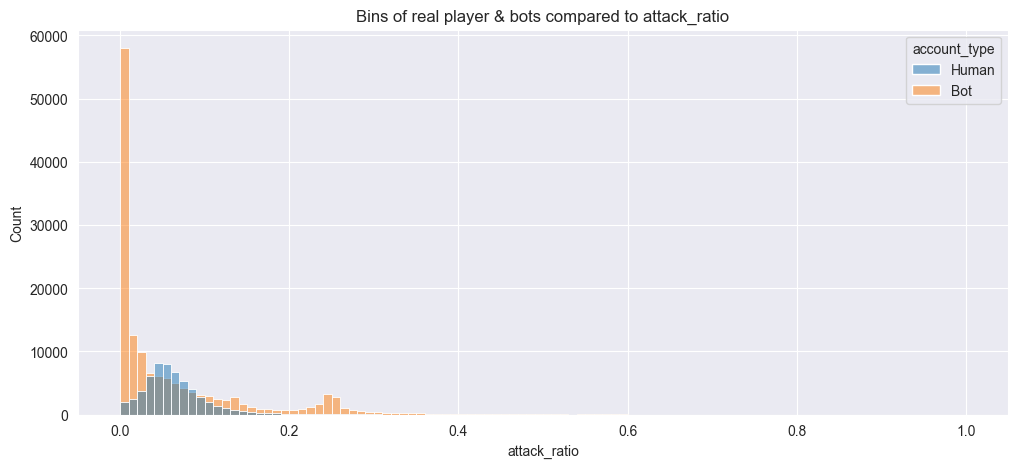

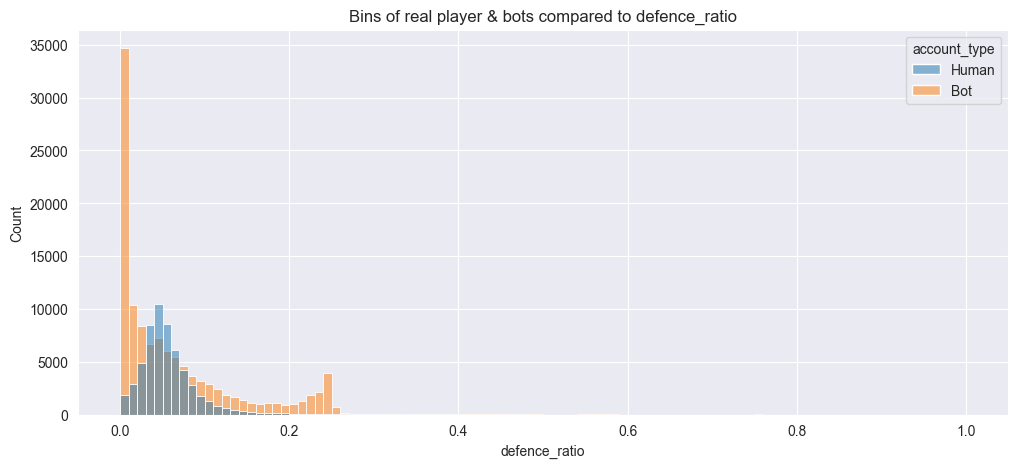

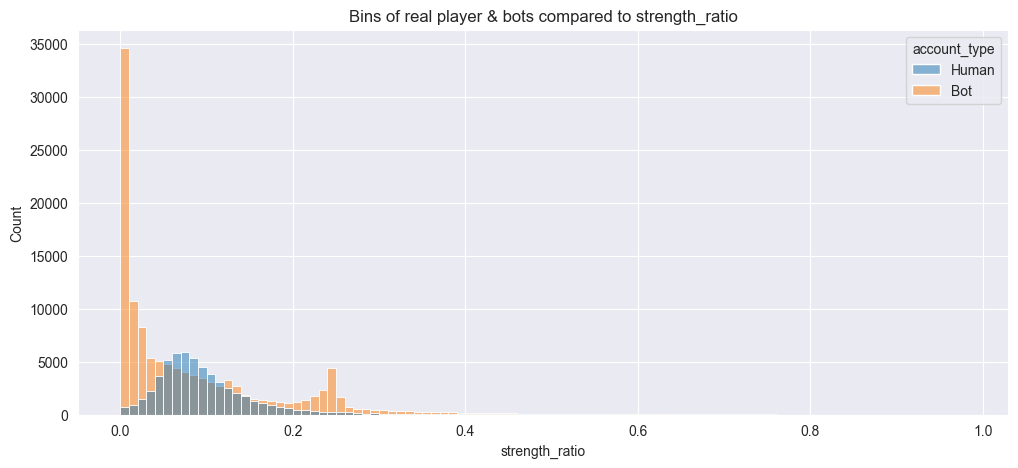

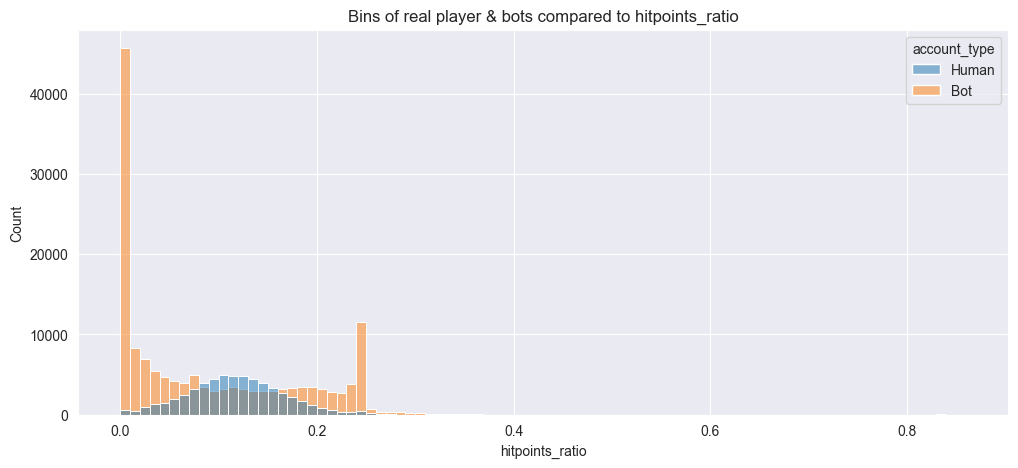

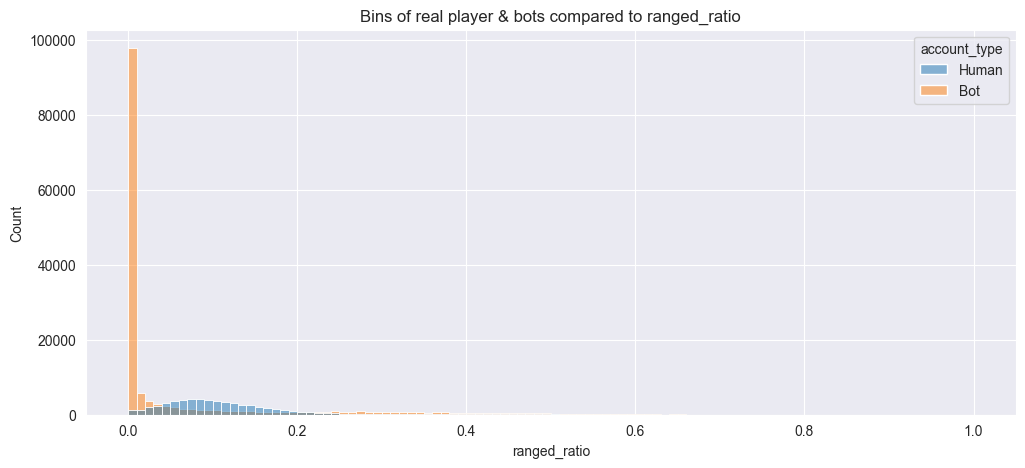

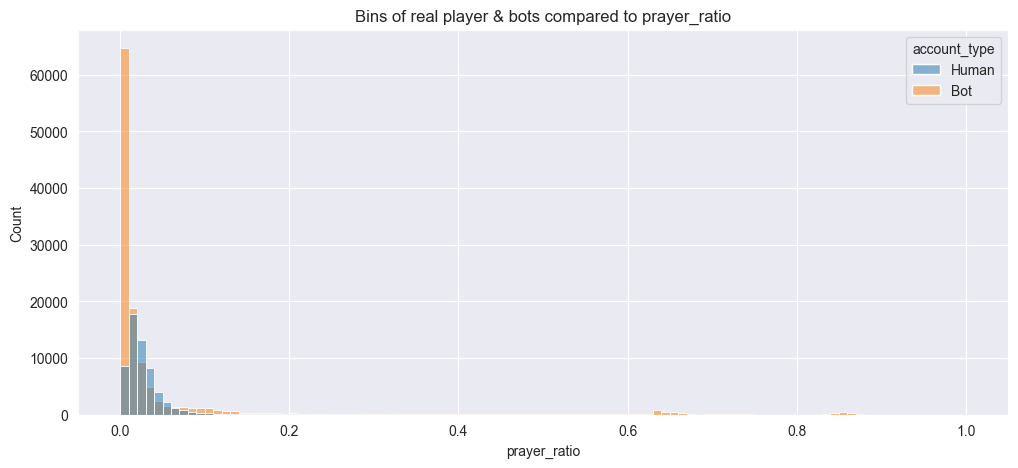

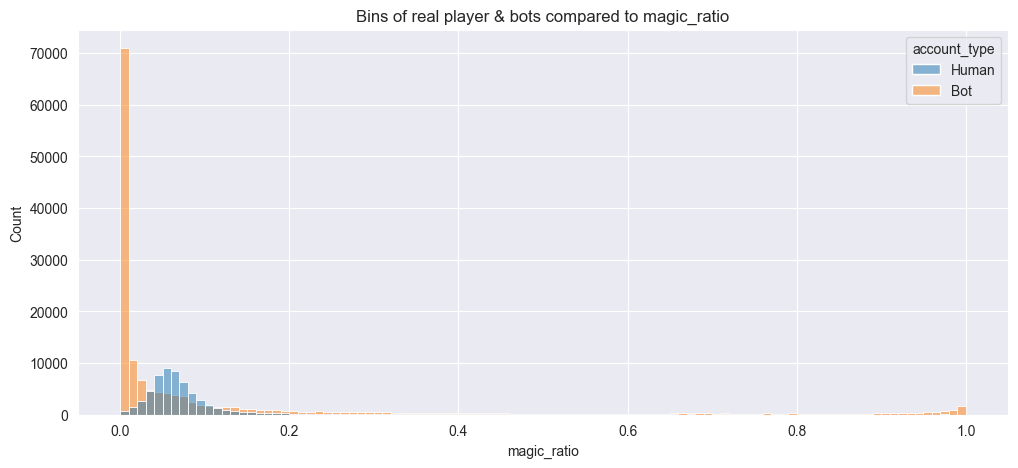

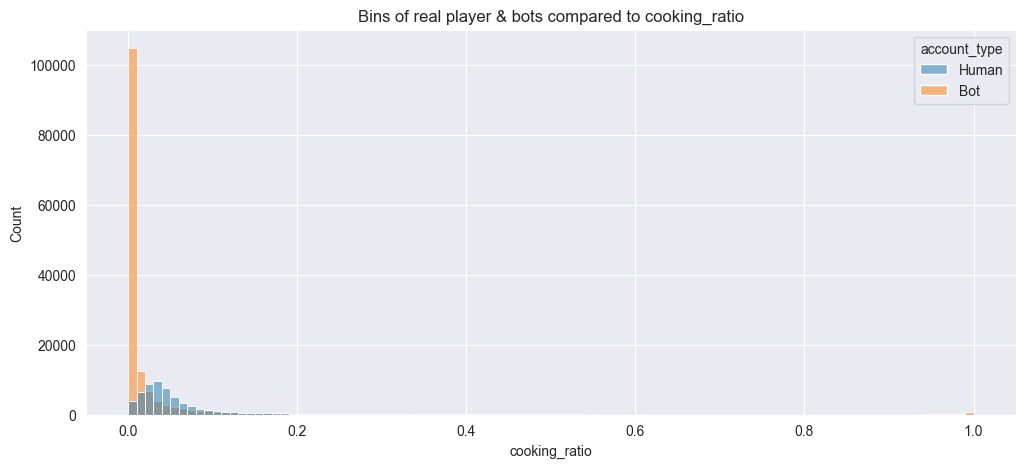

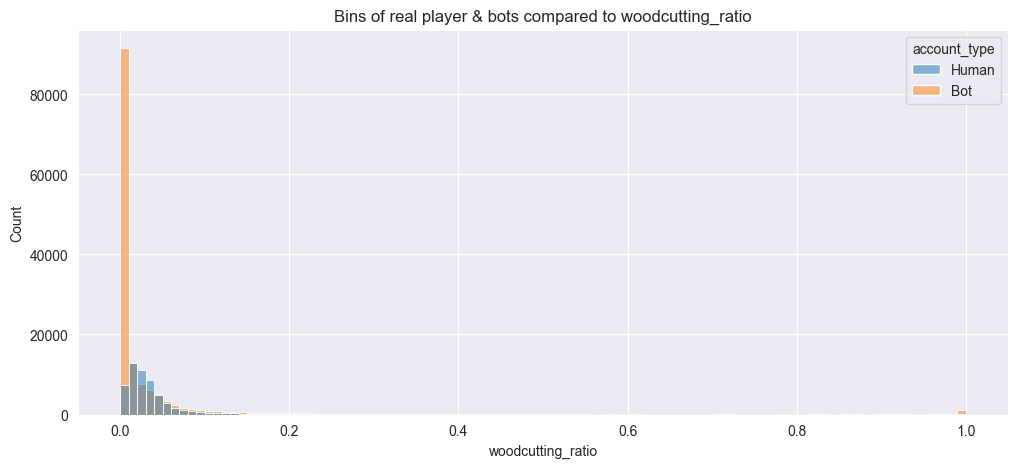

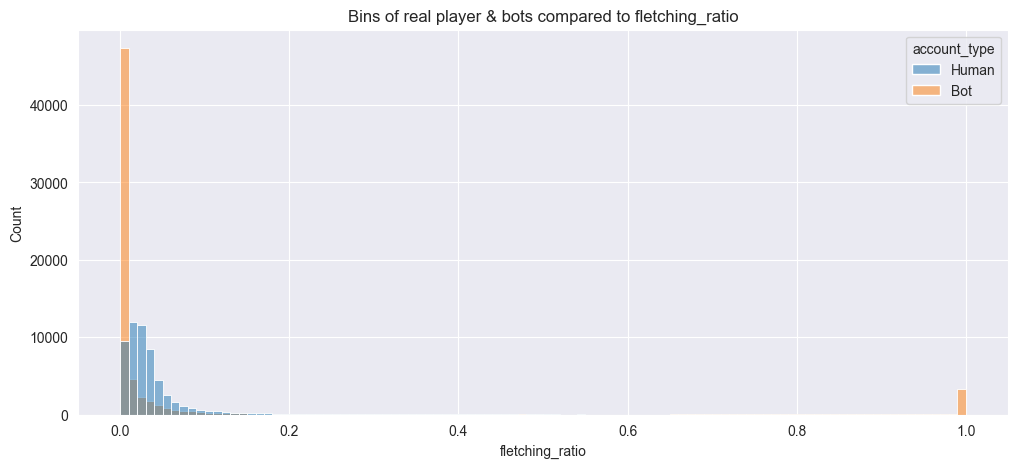

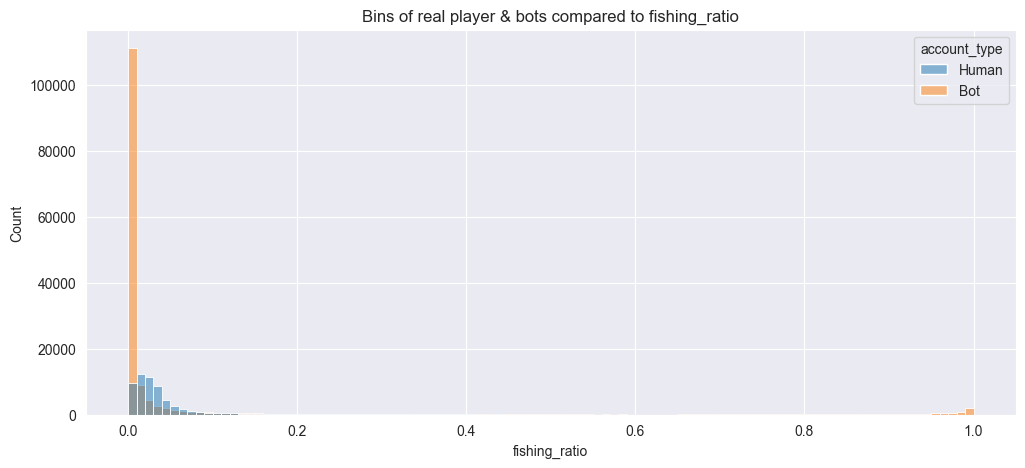

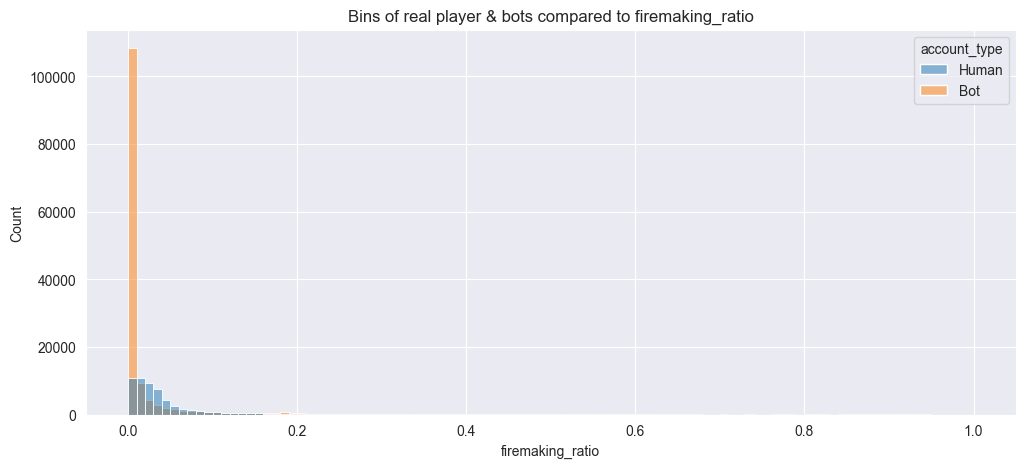

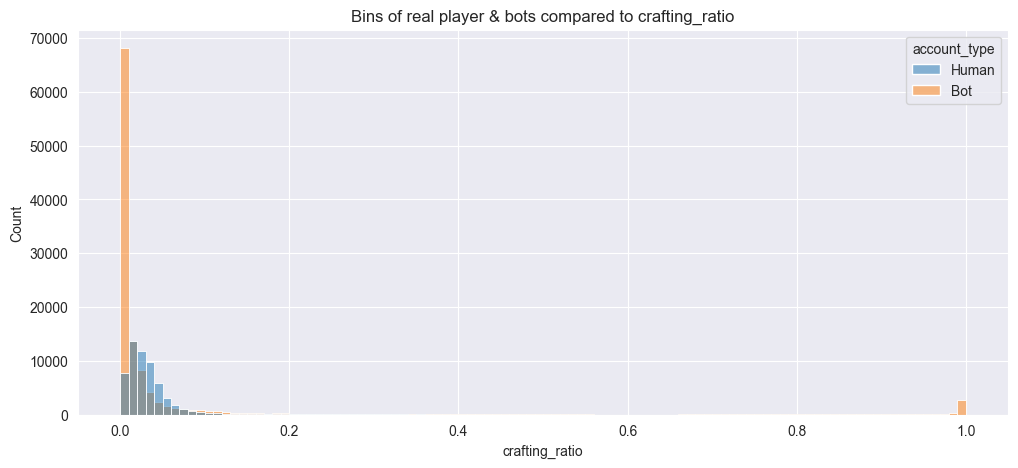

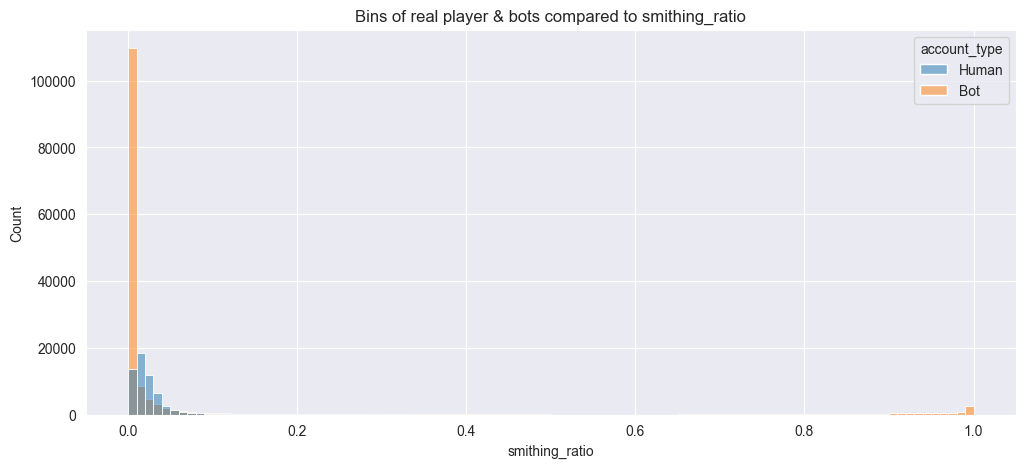

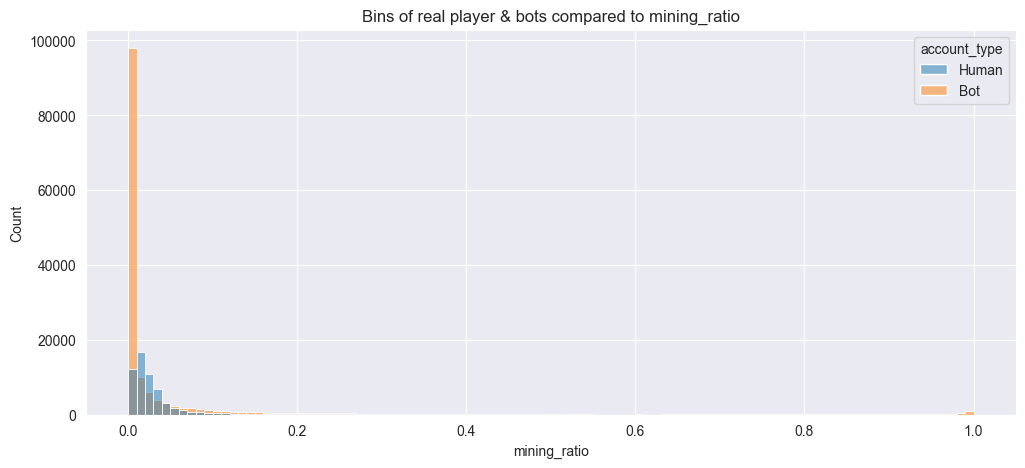

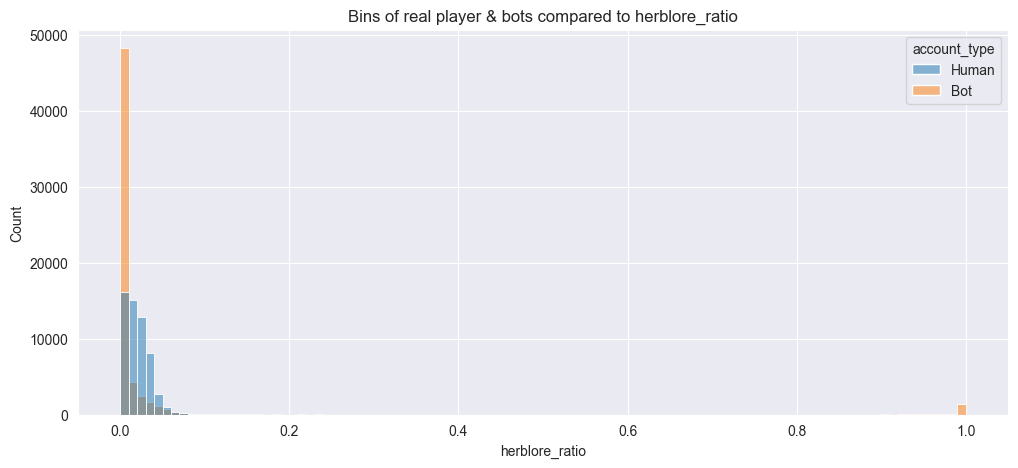

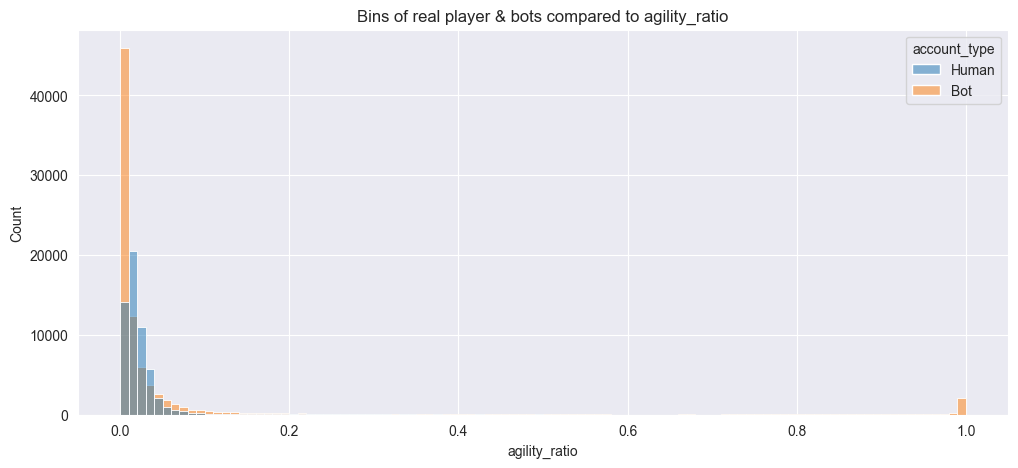

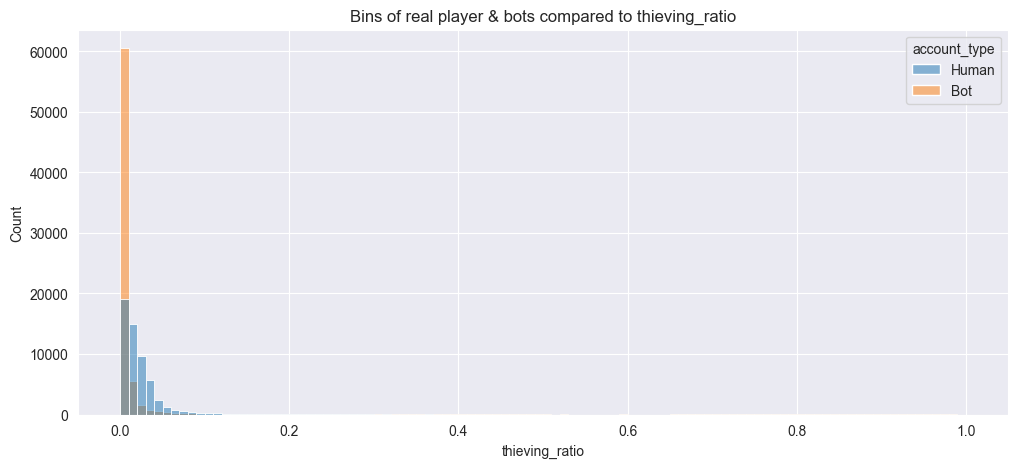

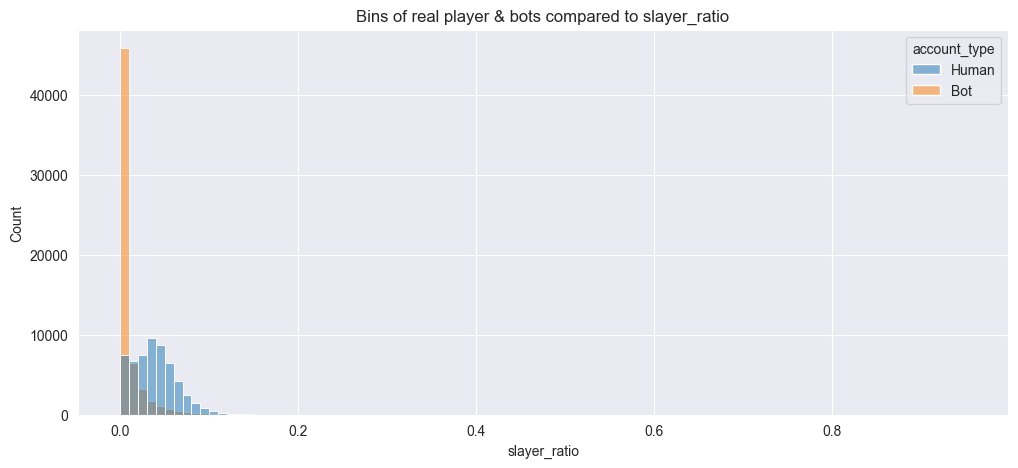

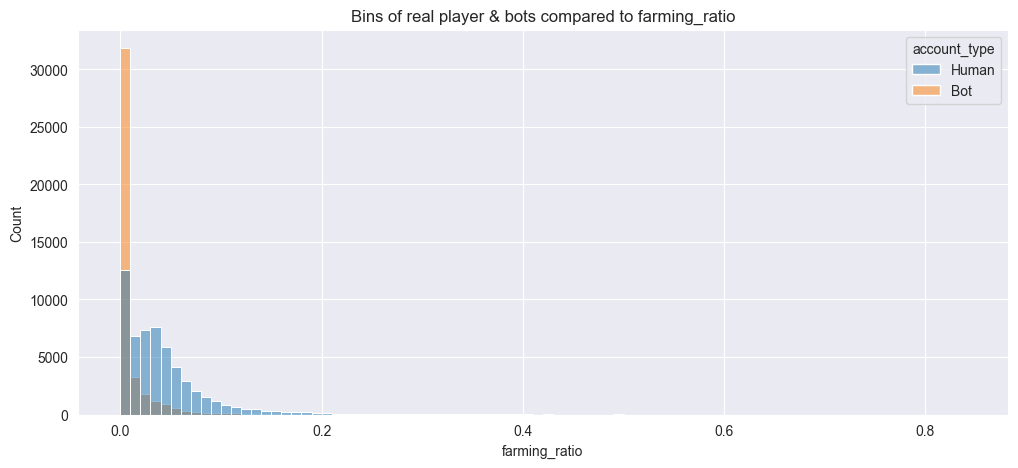

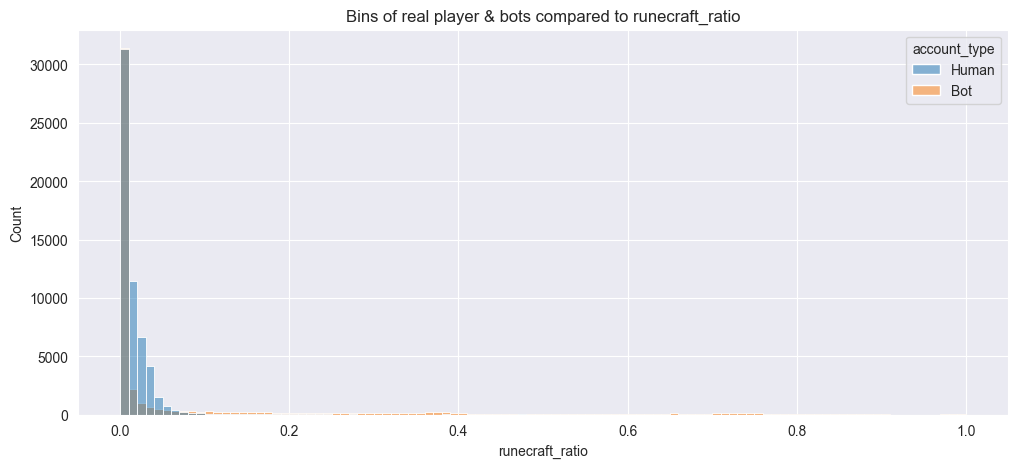

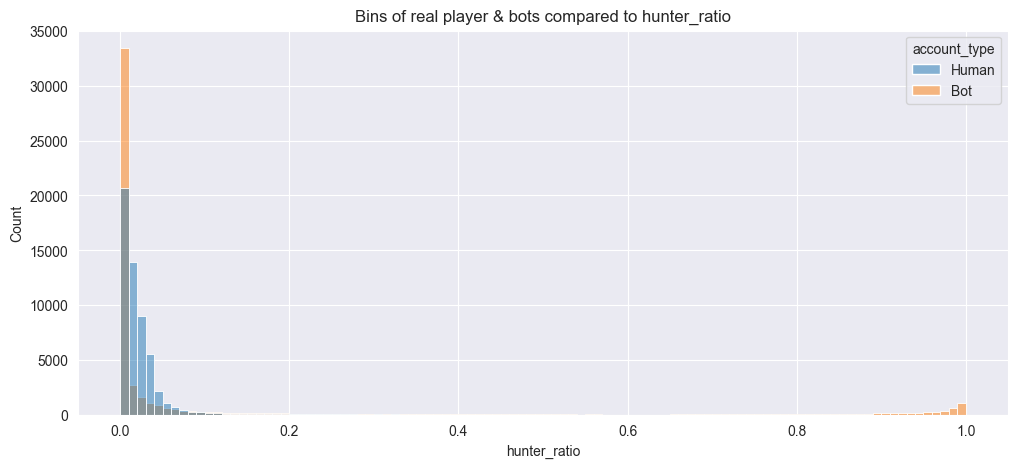

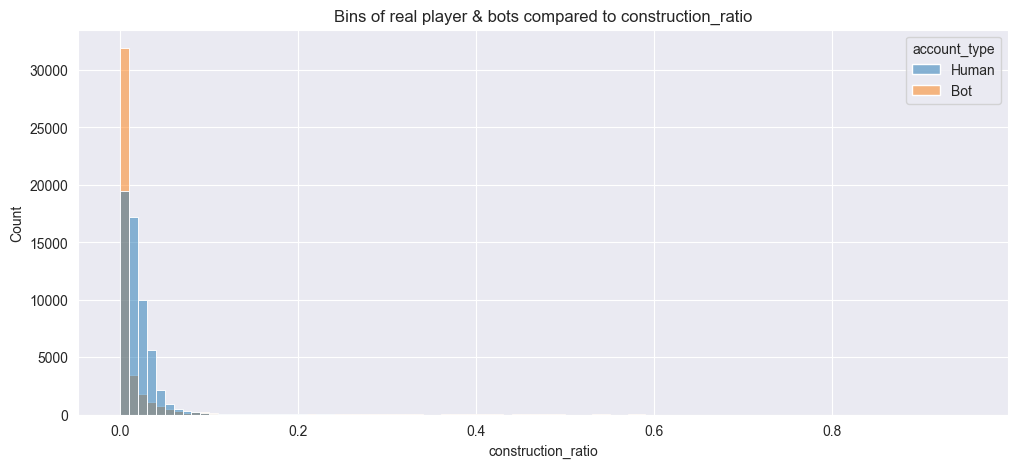

In [45]:
_df = df_player.merge(df_skill_features, left_index=True, right_index=True).copy()
for skill_ratio in df_skill_features.columns:
    if "_ratio" not in skill_ratio:
        continue
    query = f"{skill_ratio} > 0 and {skill_ratio} < 1"
    compare_ratio(skill_ratio, _df.query(query).copy())

# look at boss ratio real vs bots

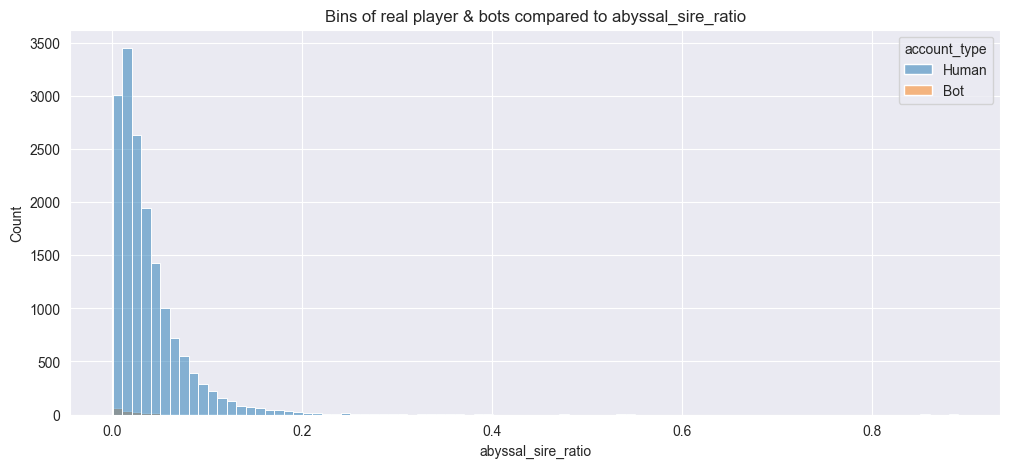

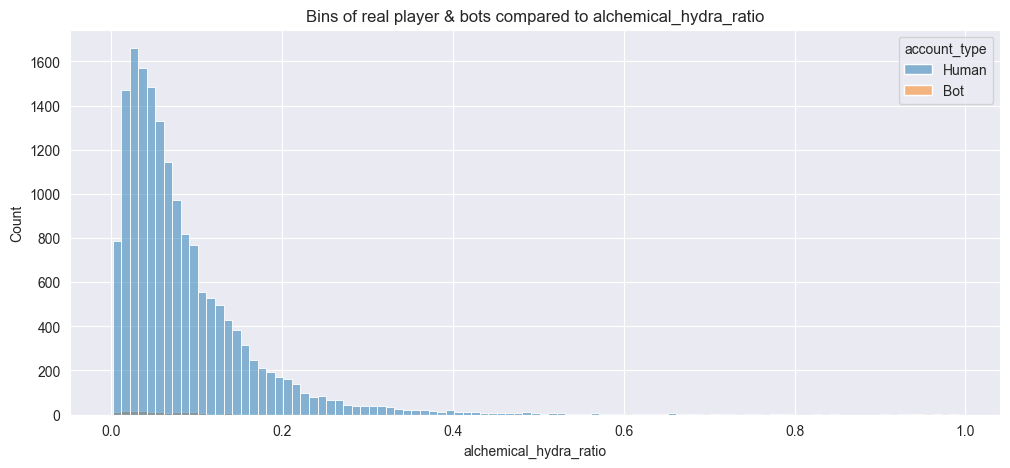

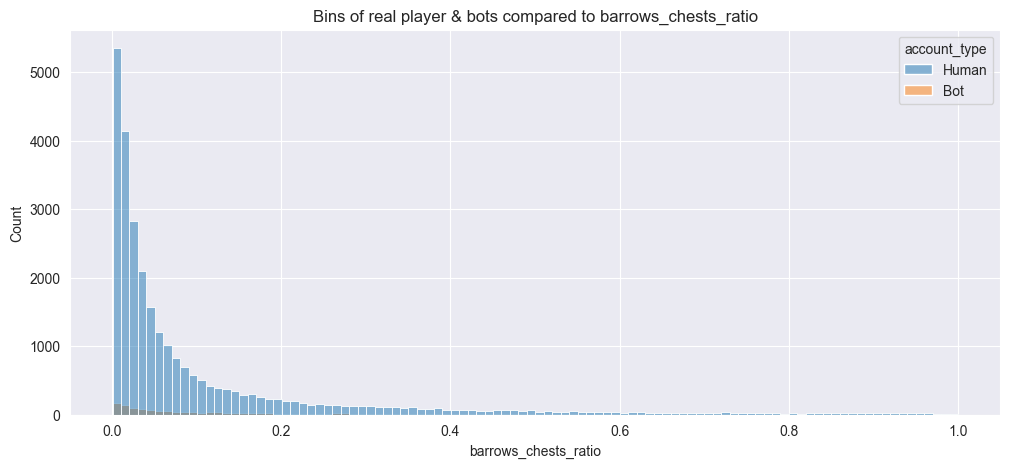

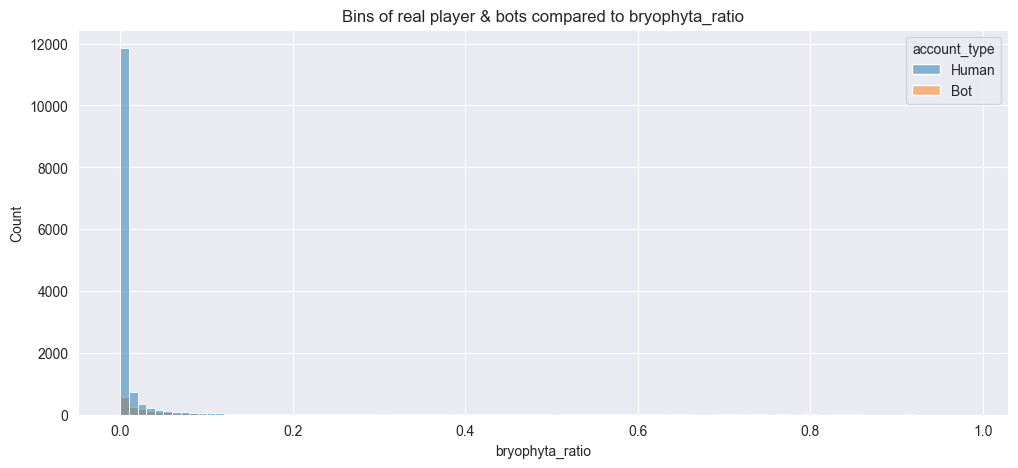

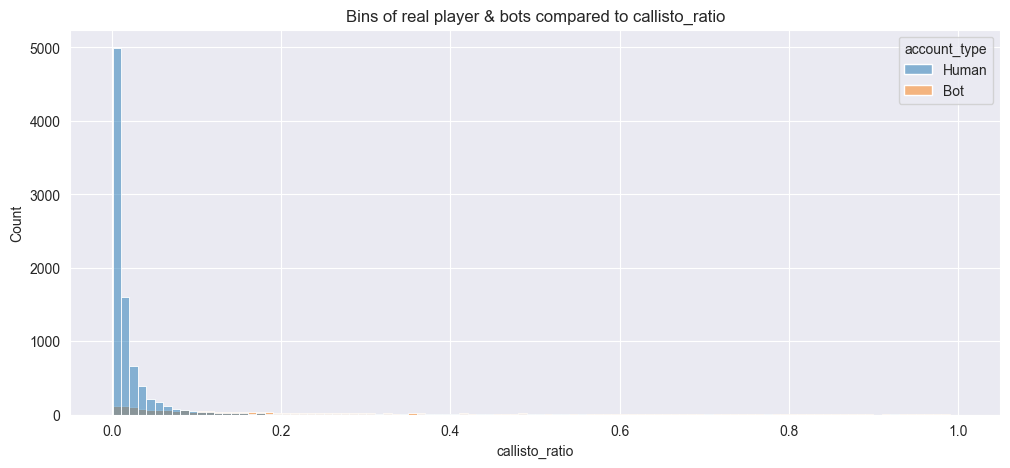

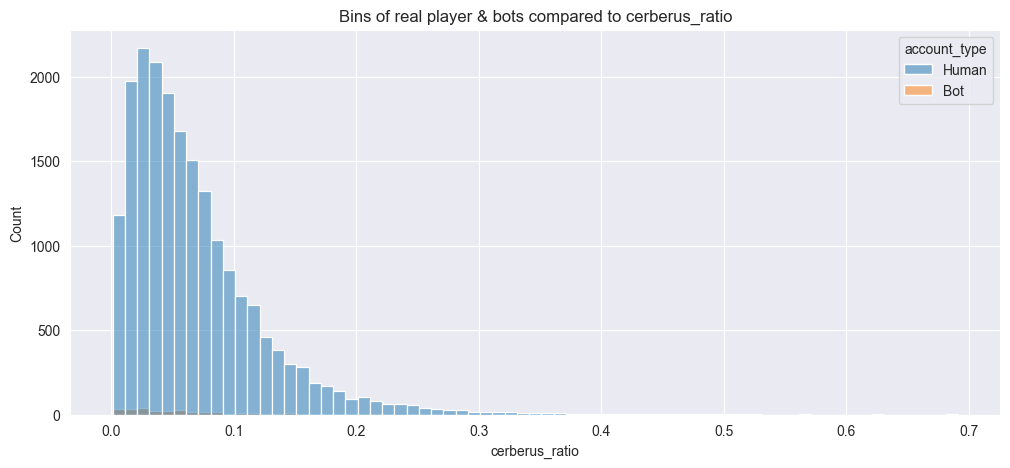

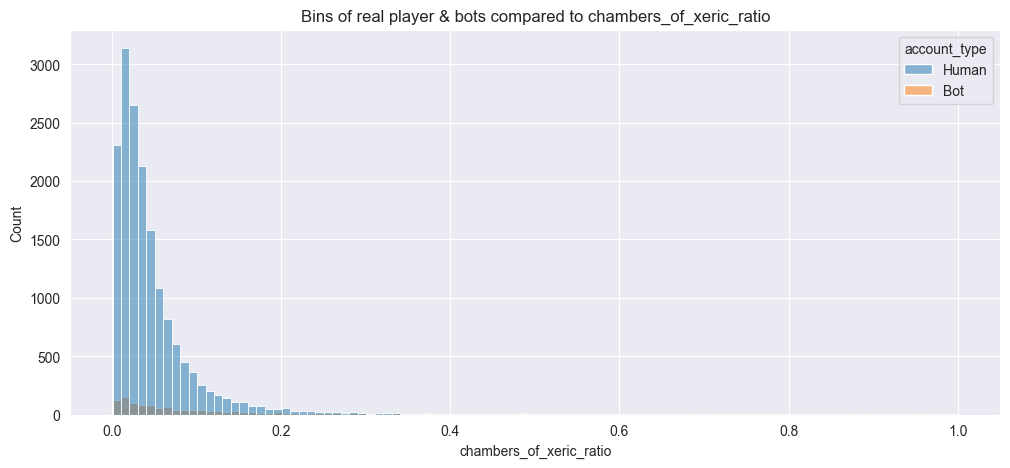

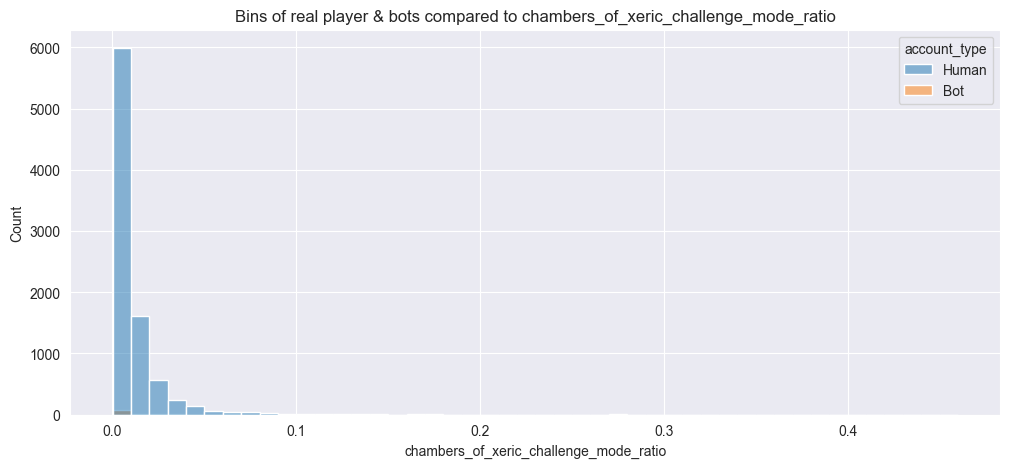

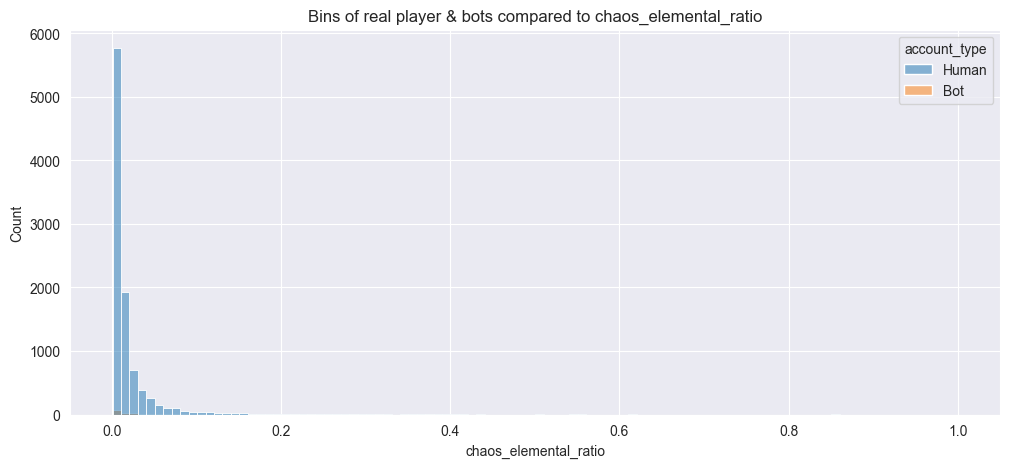

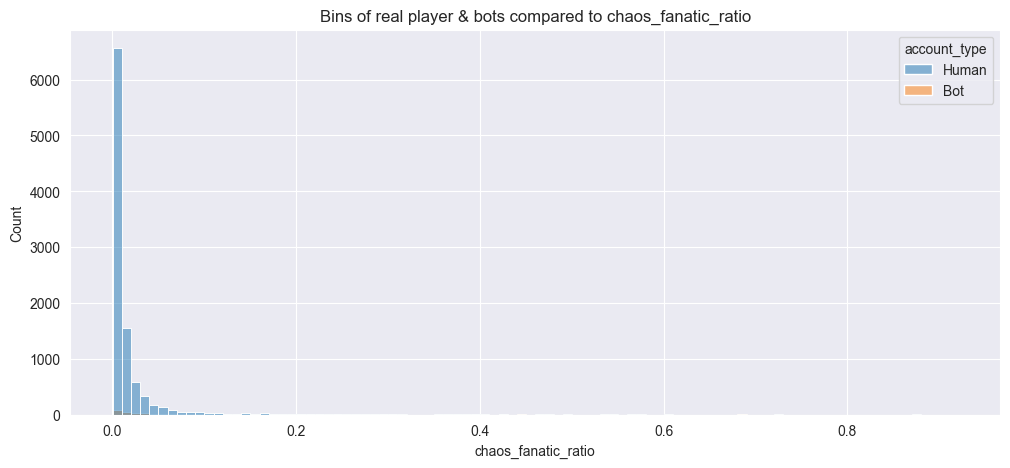

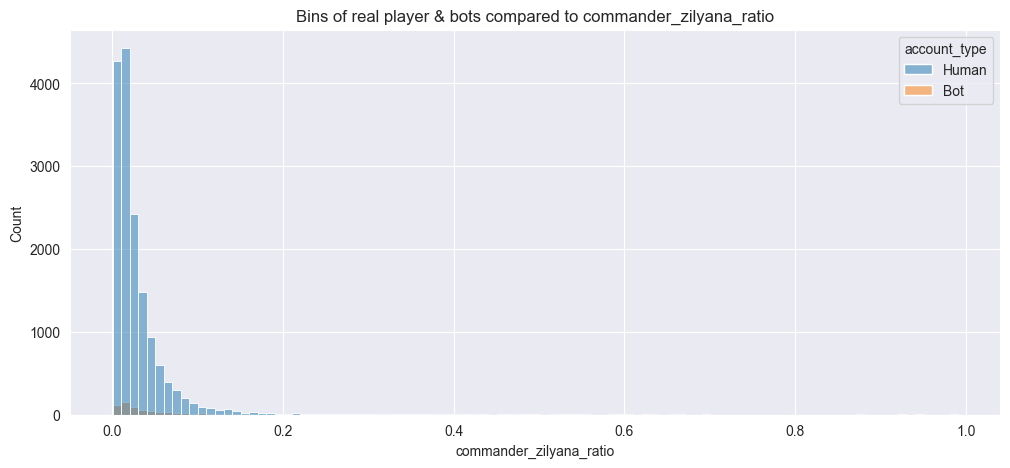

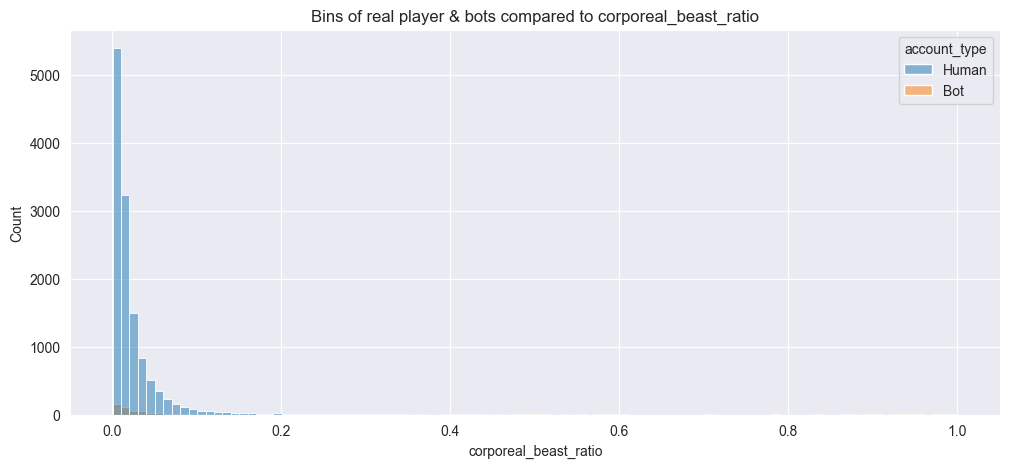

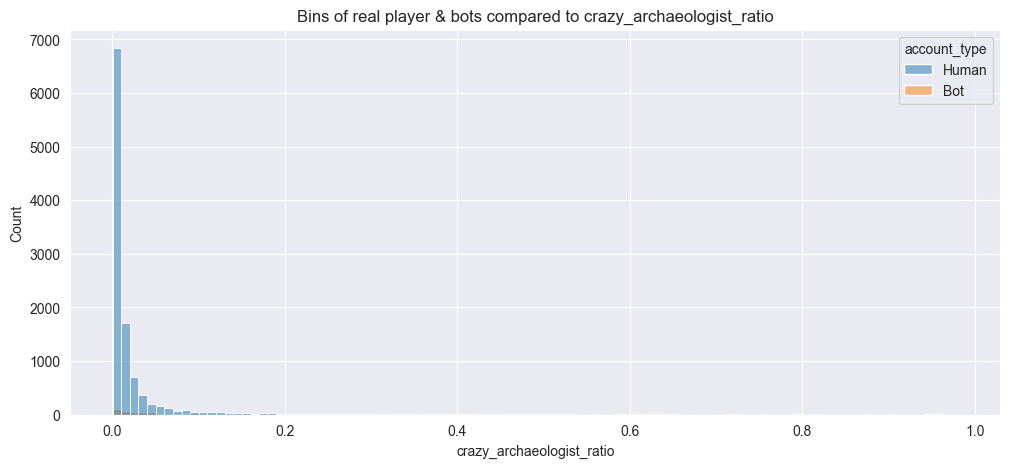

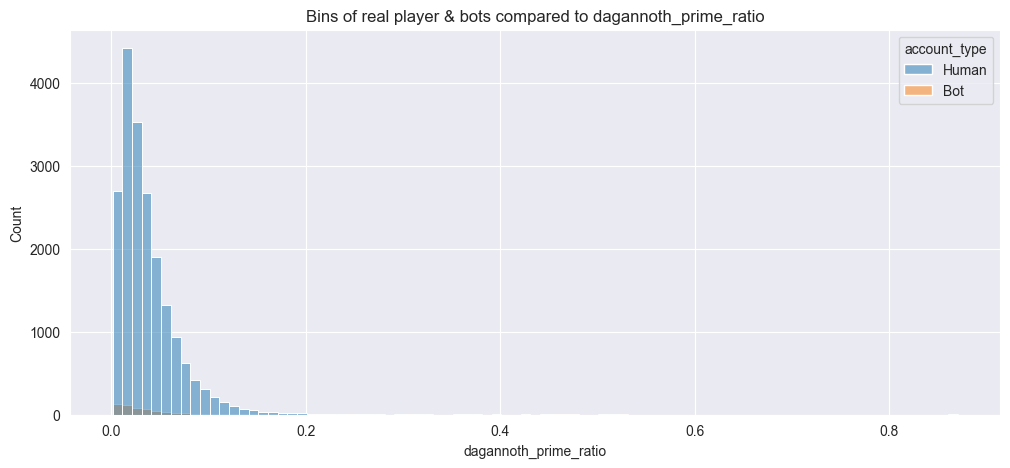

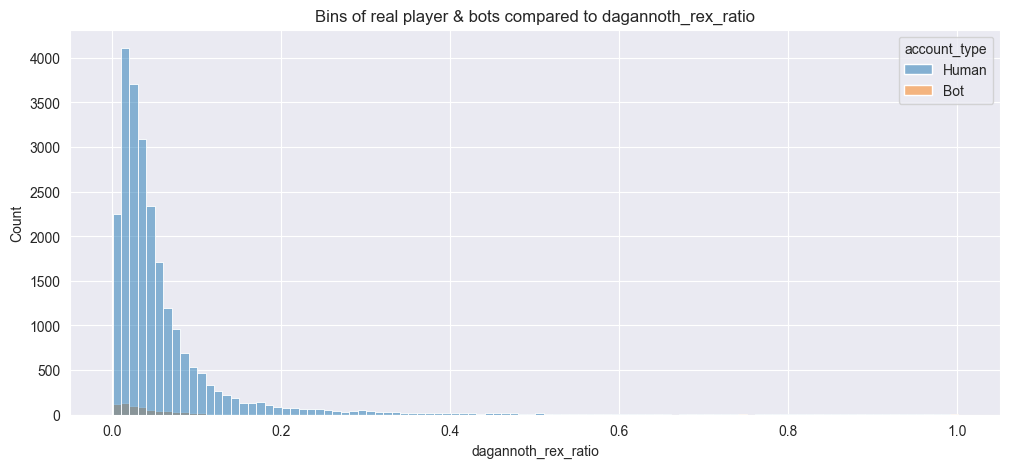

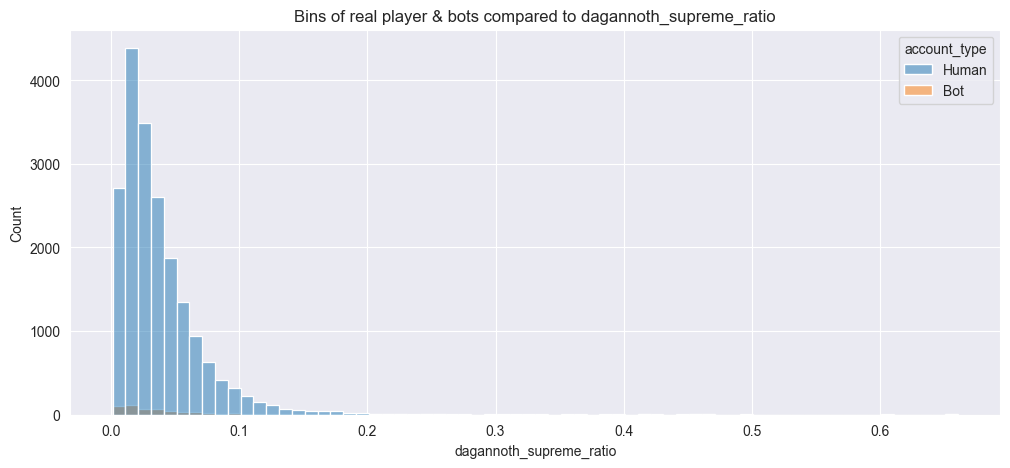

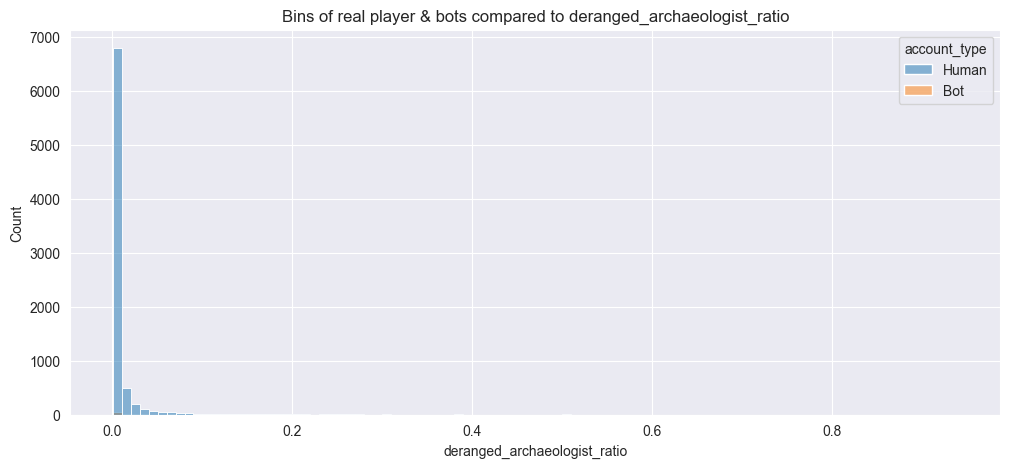

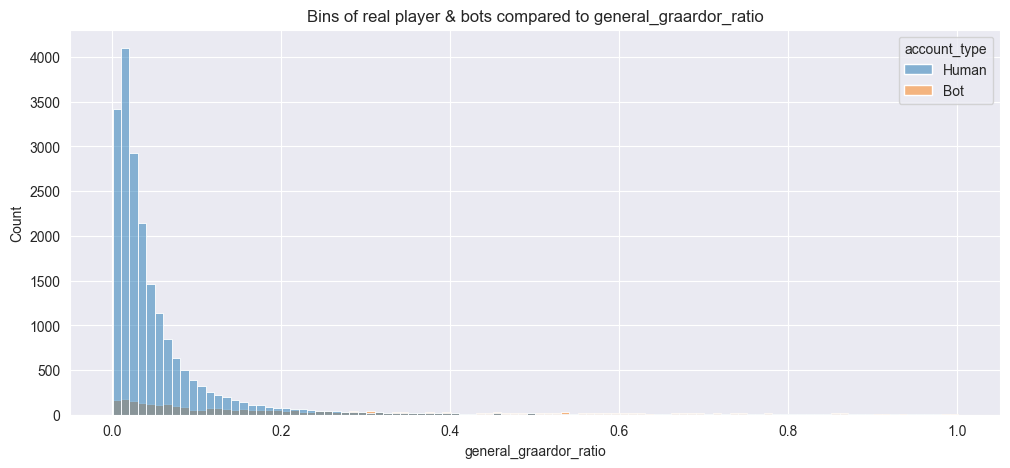

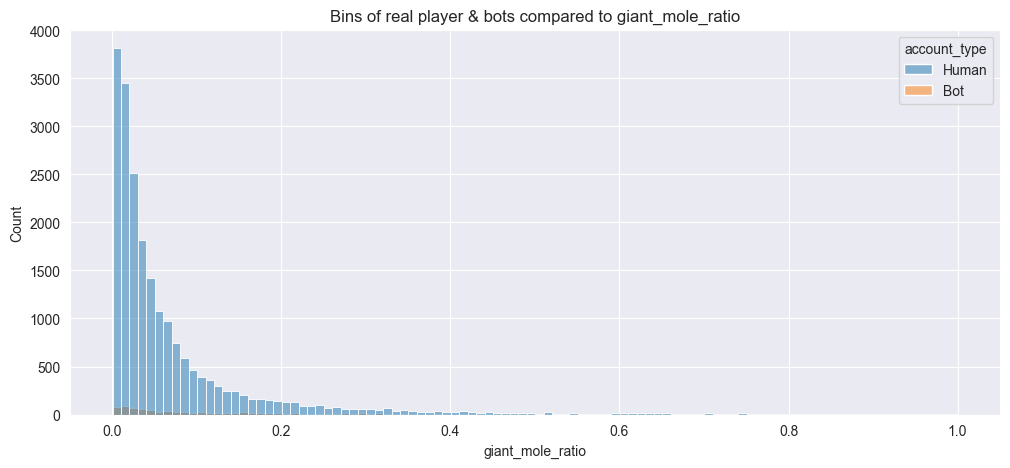

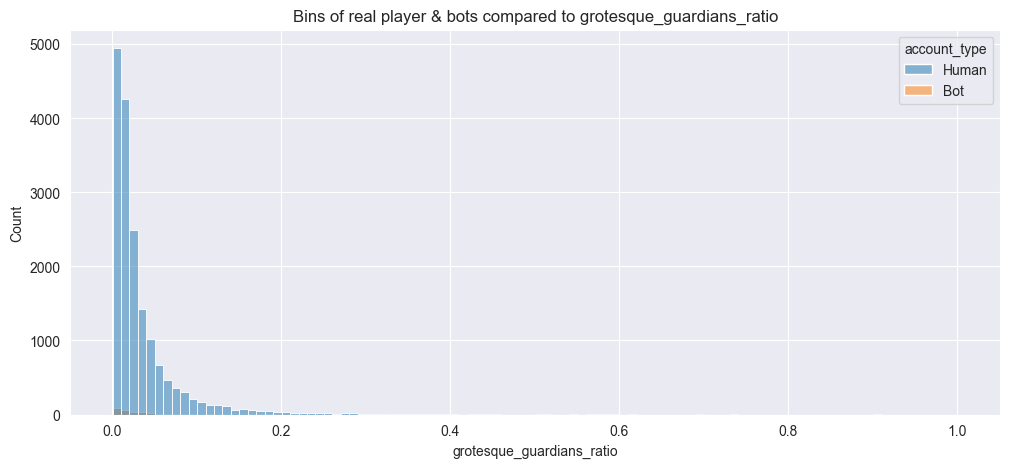

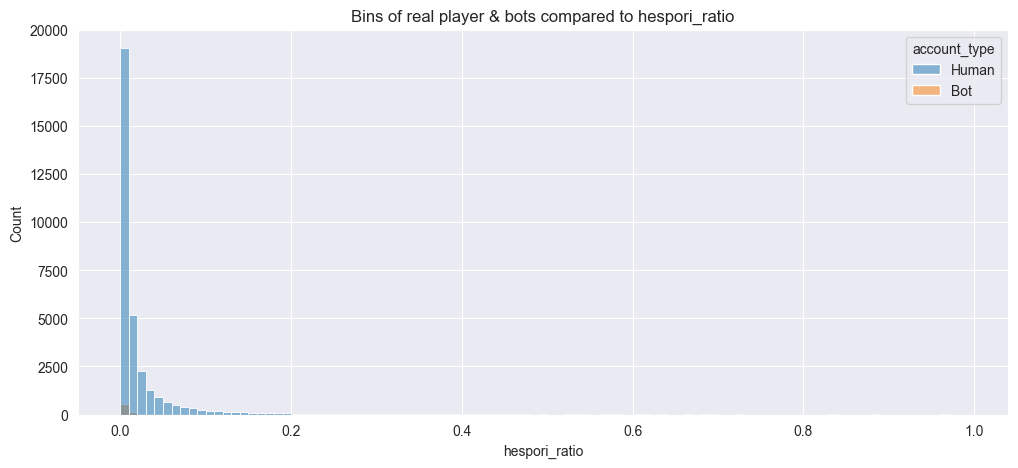

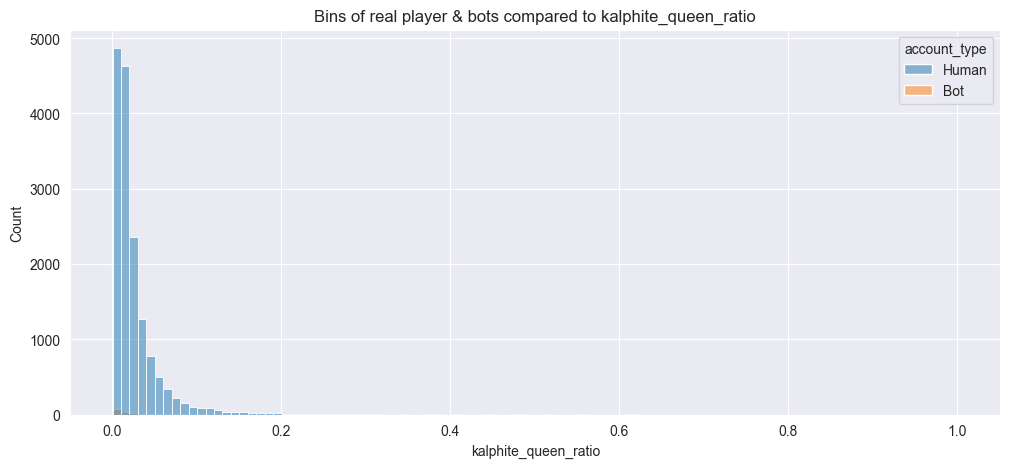

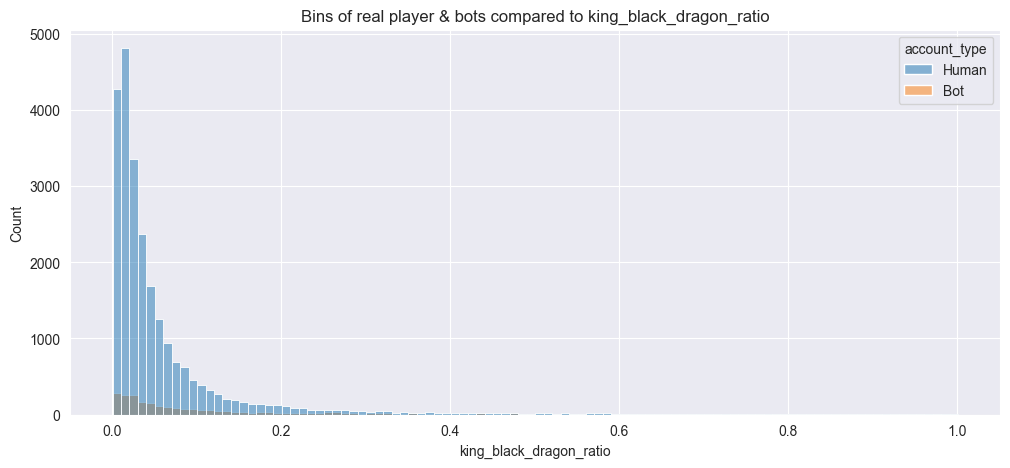

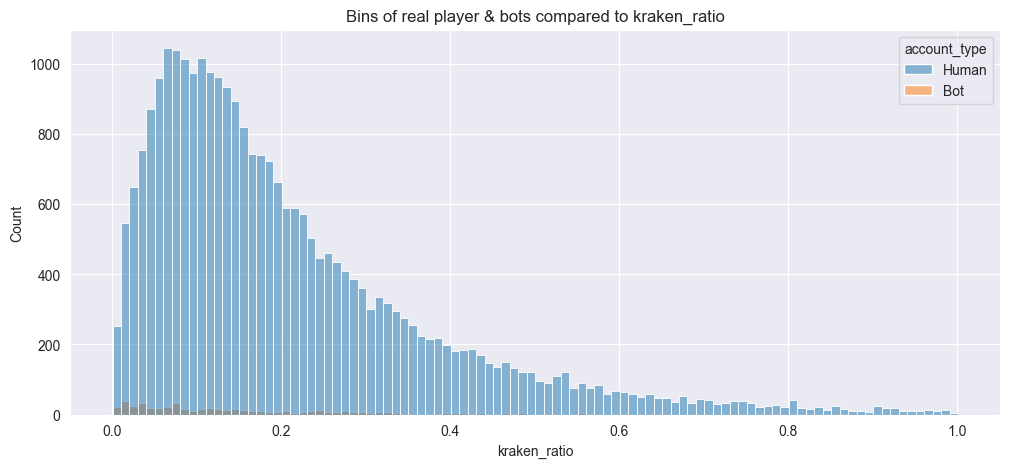

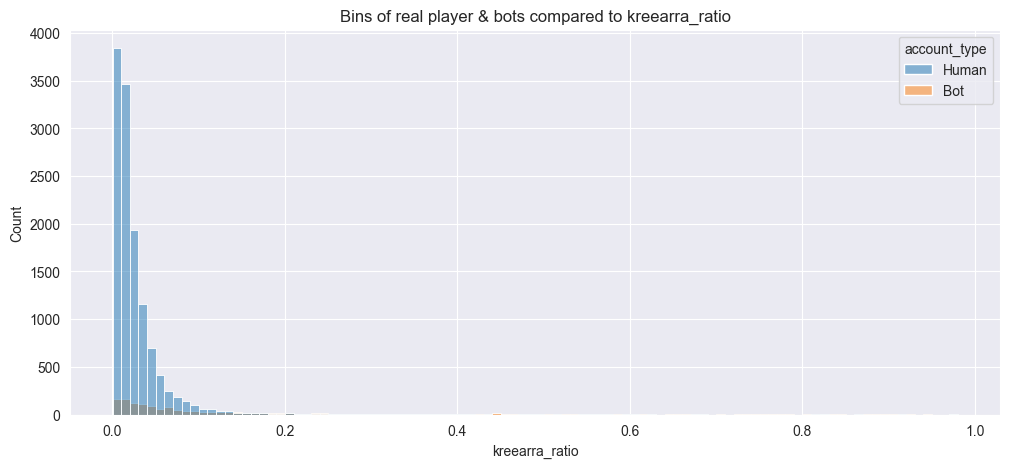

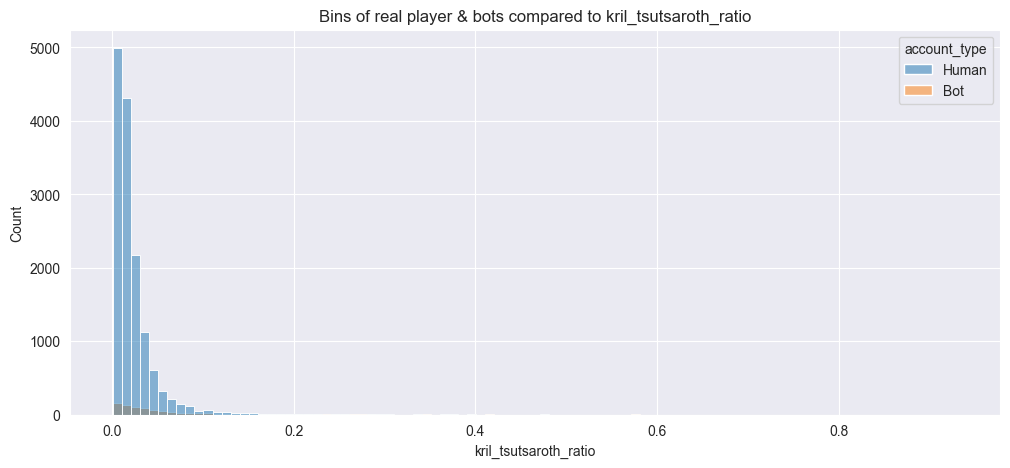

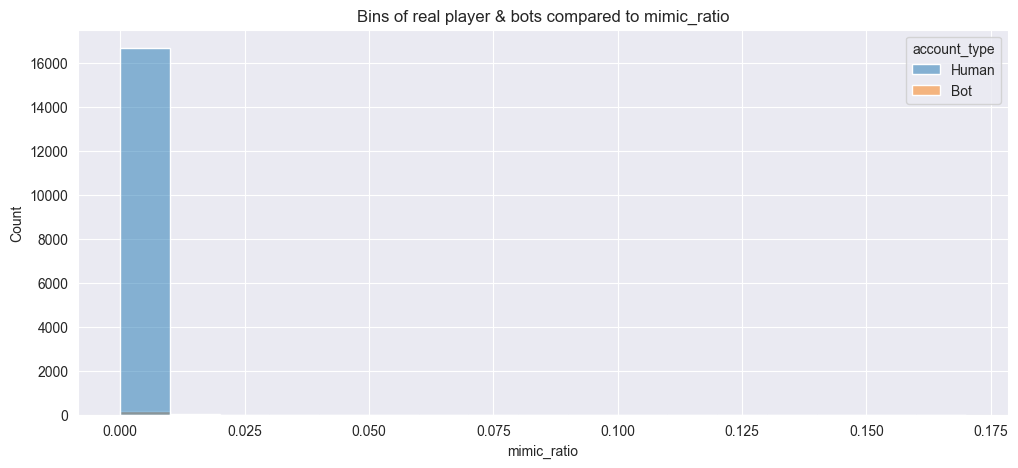

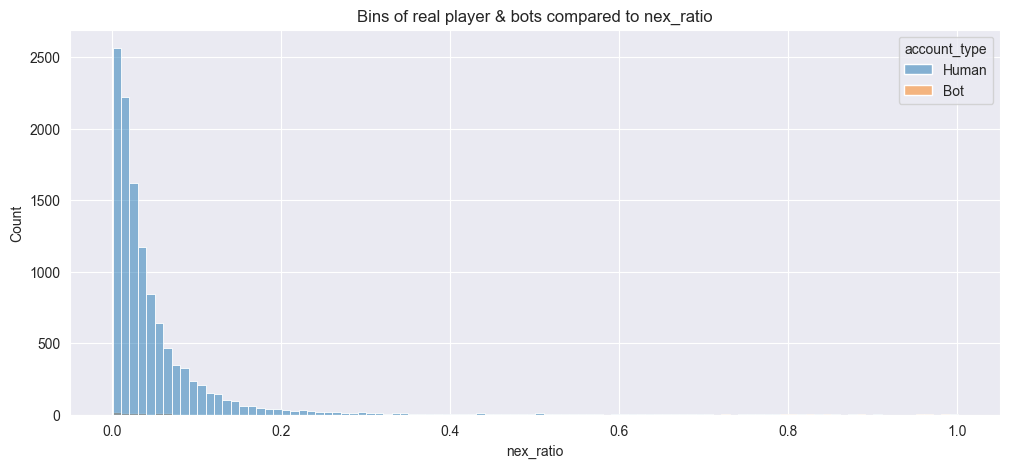

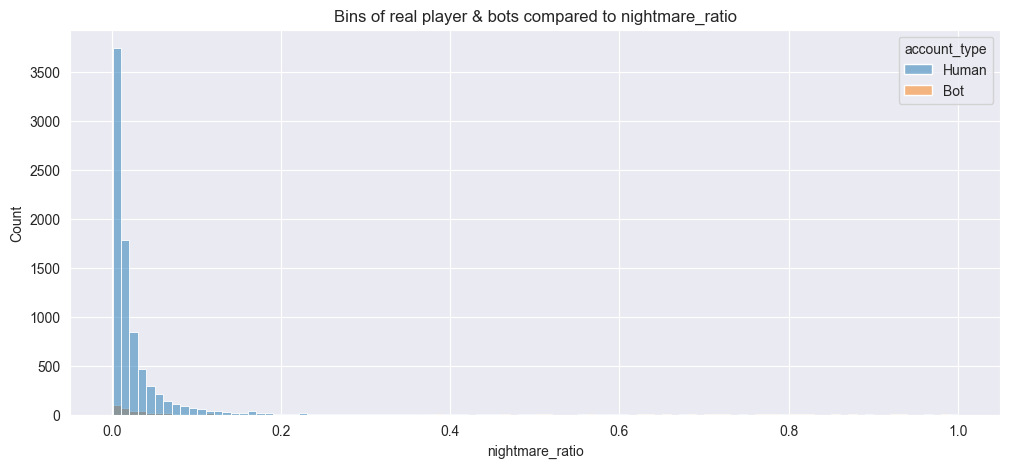

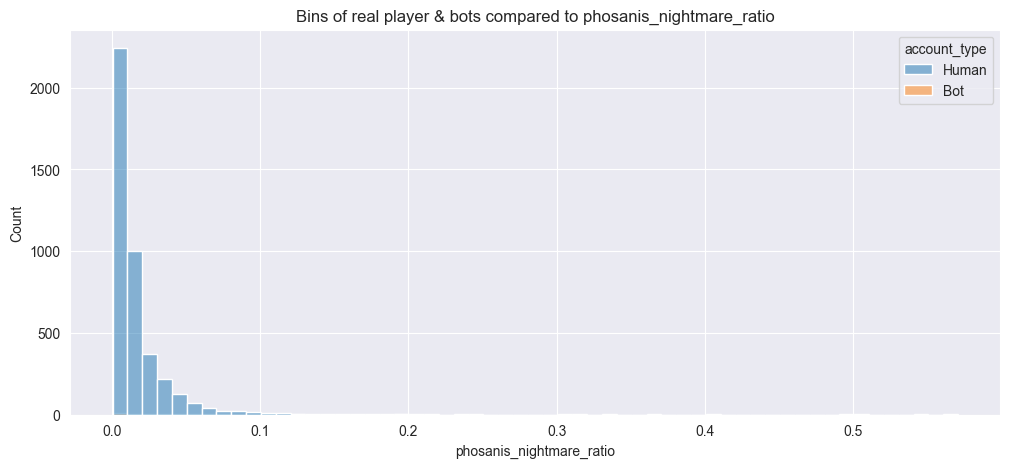

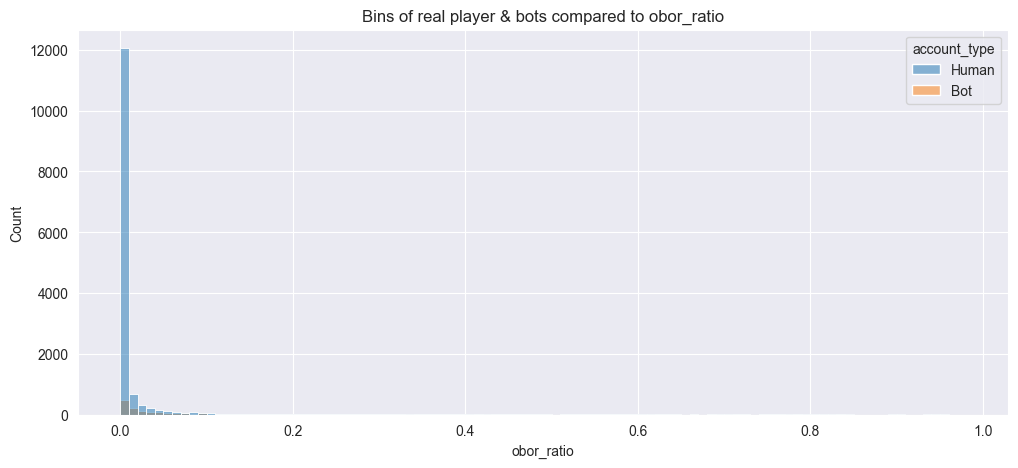

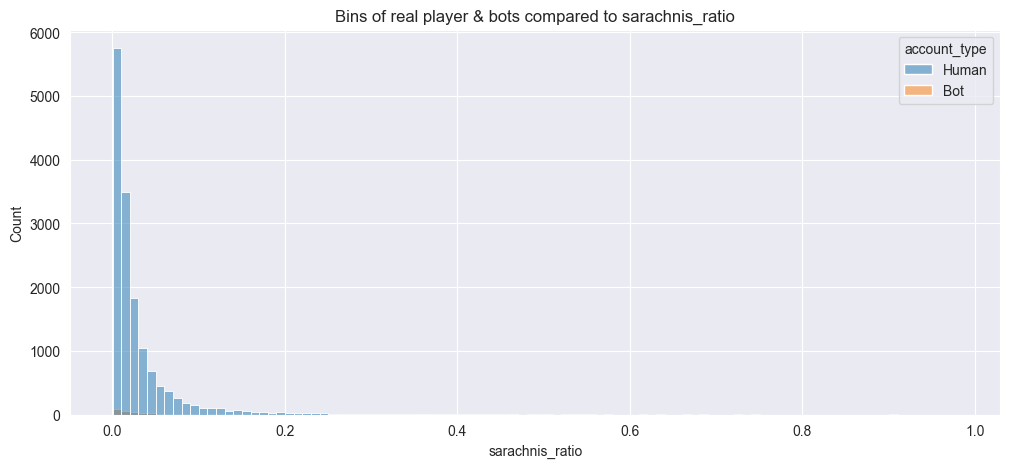

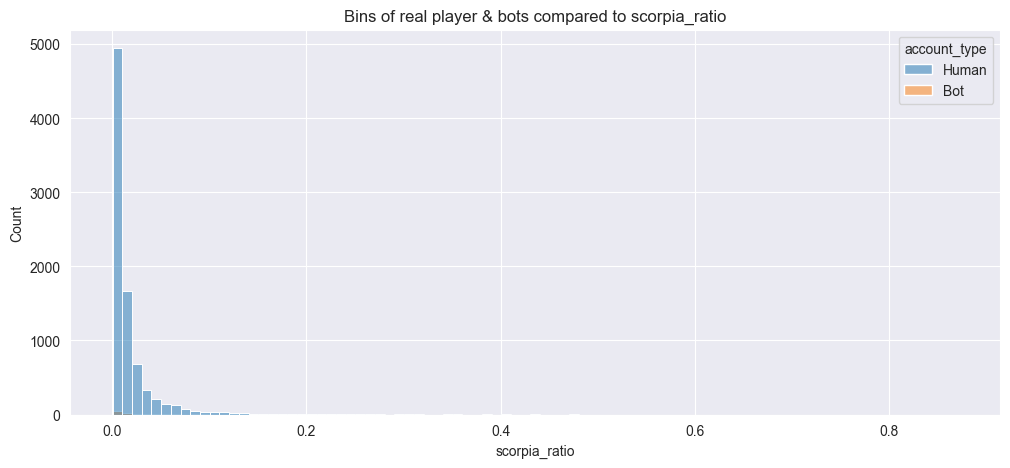

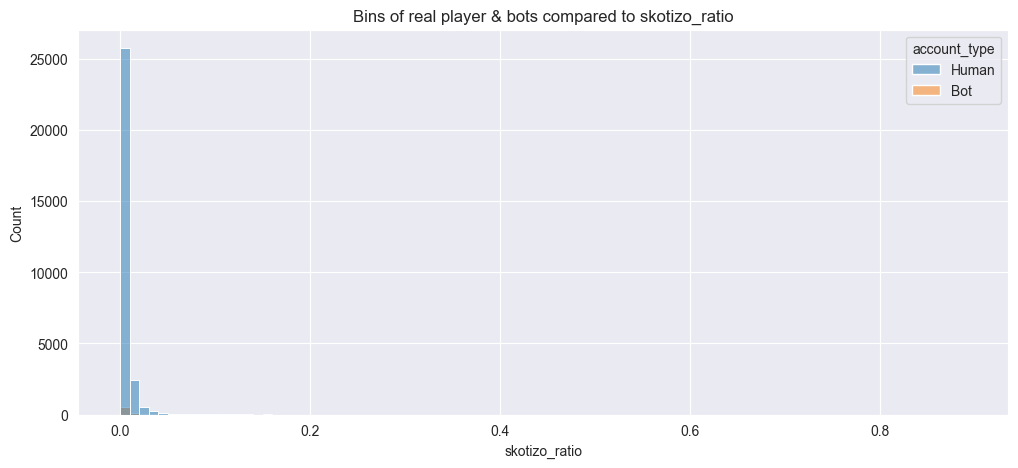

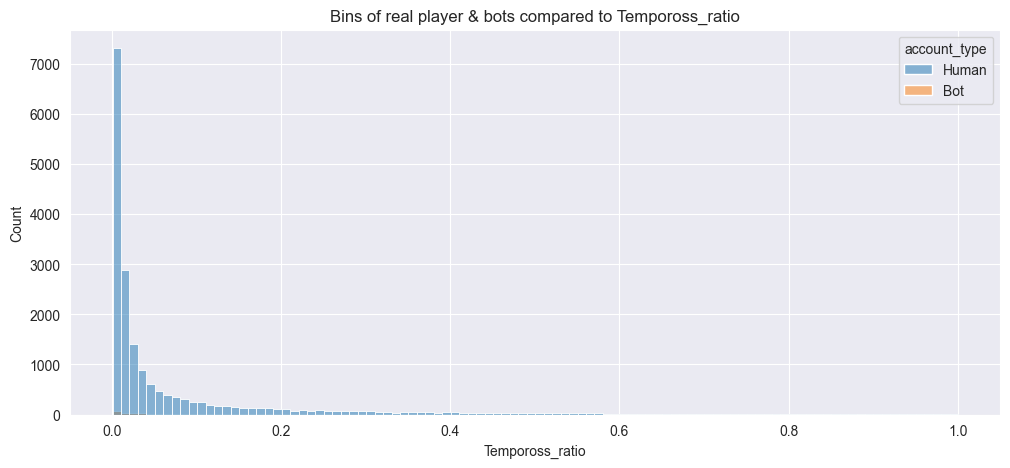

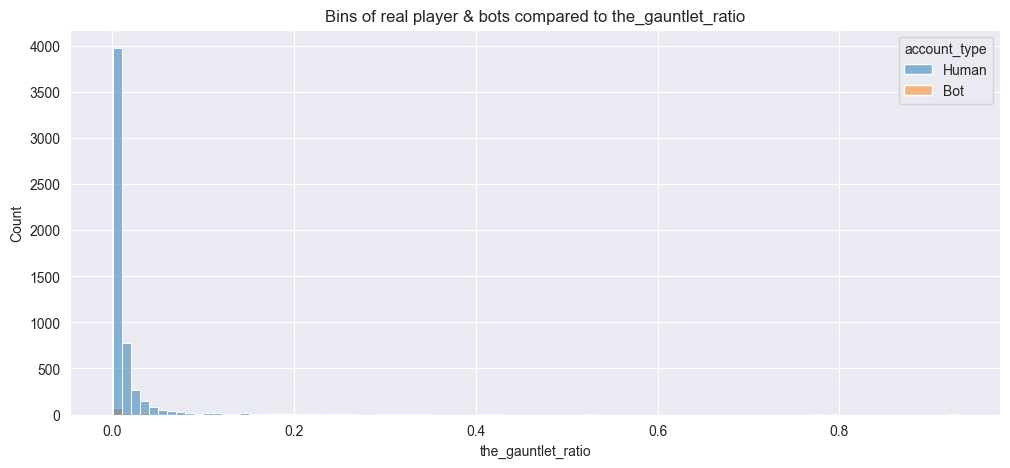

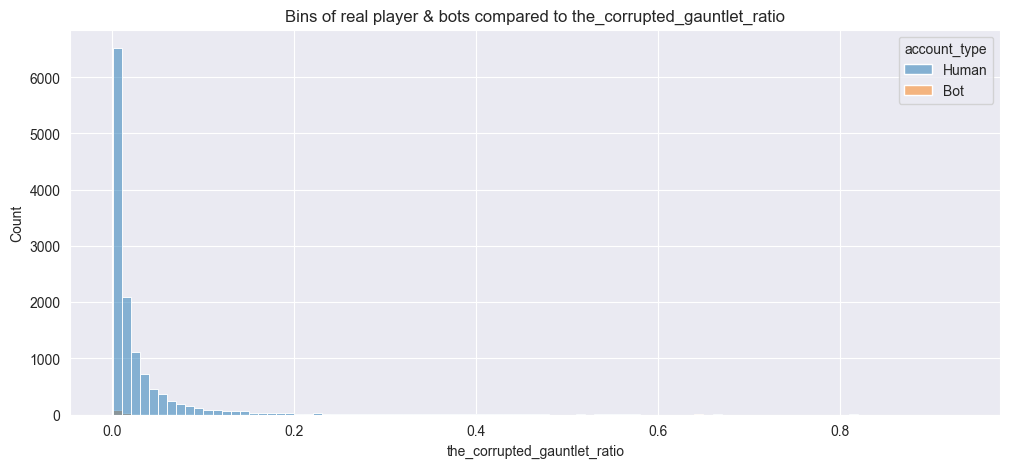

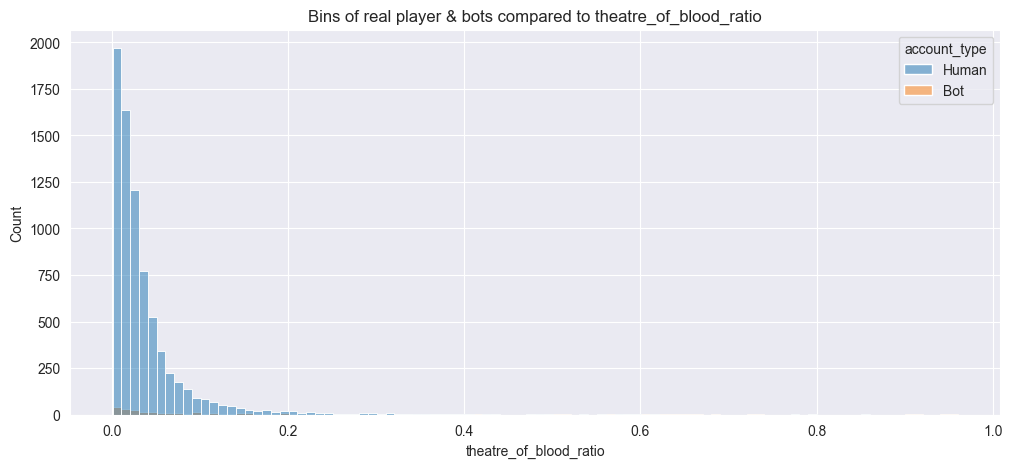

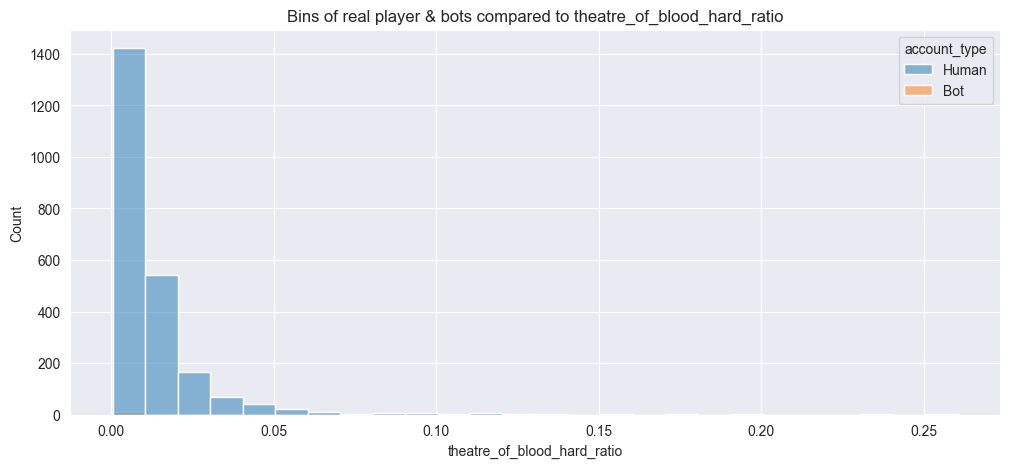

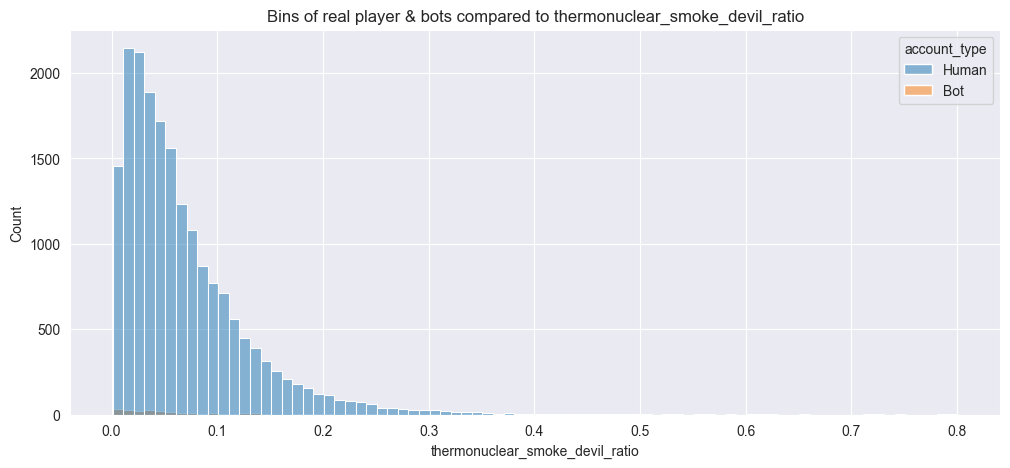

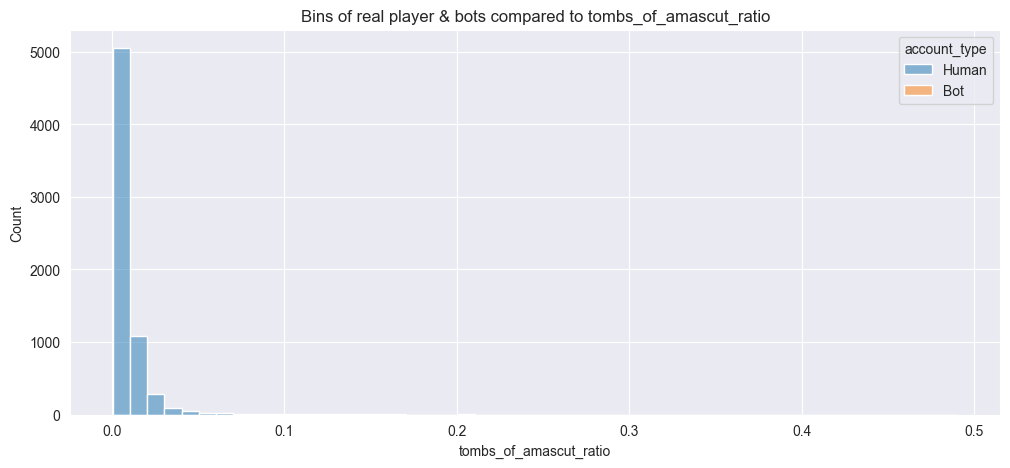

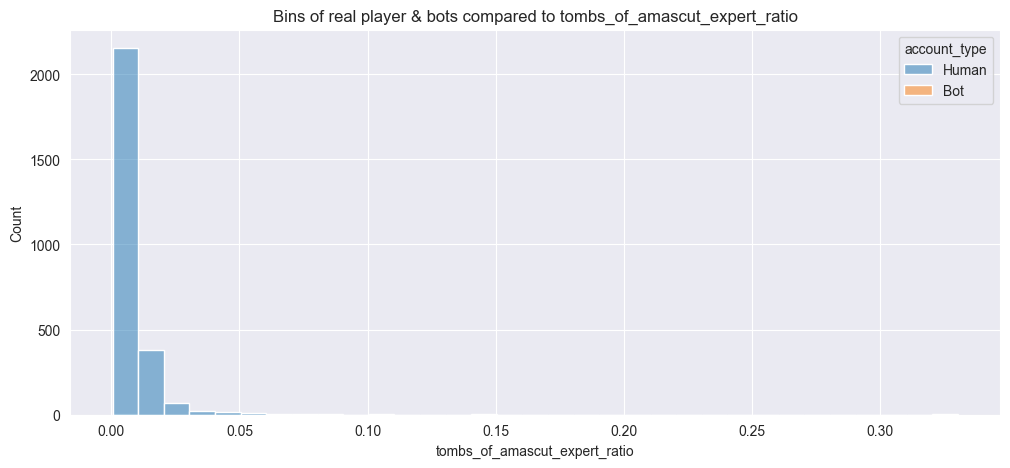

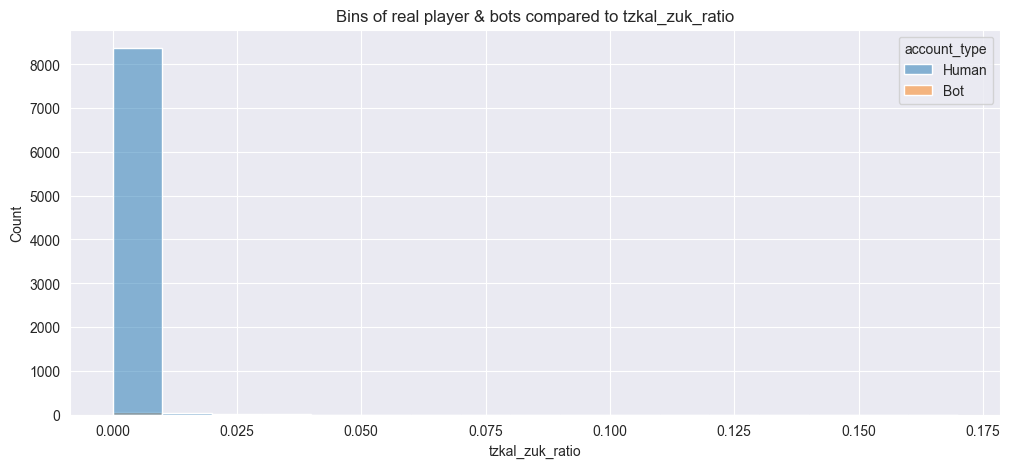

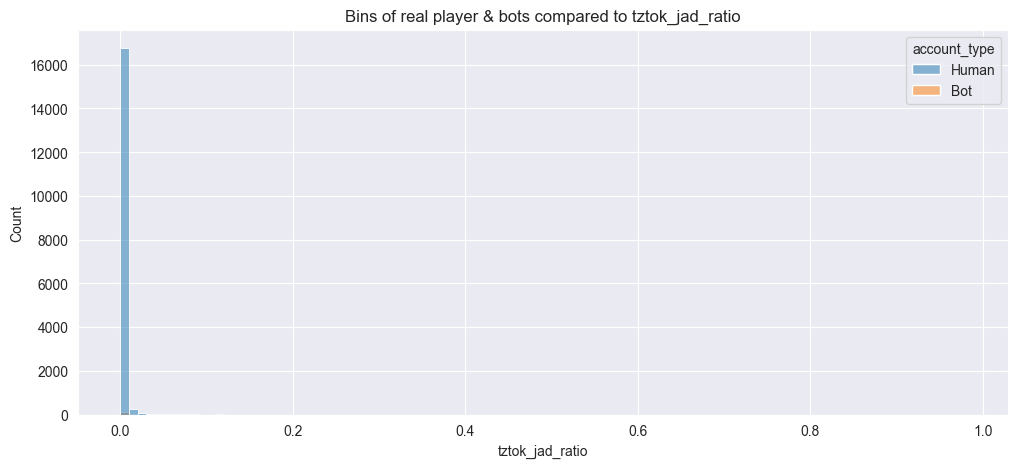

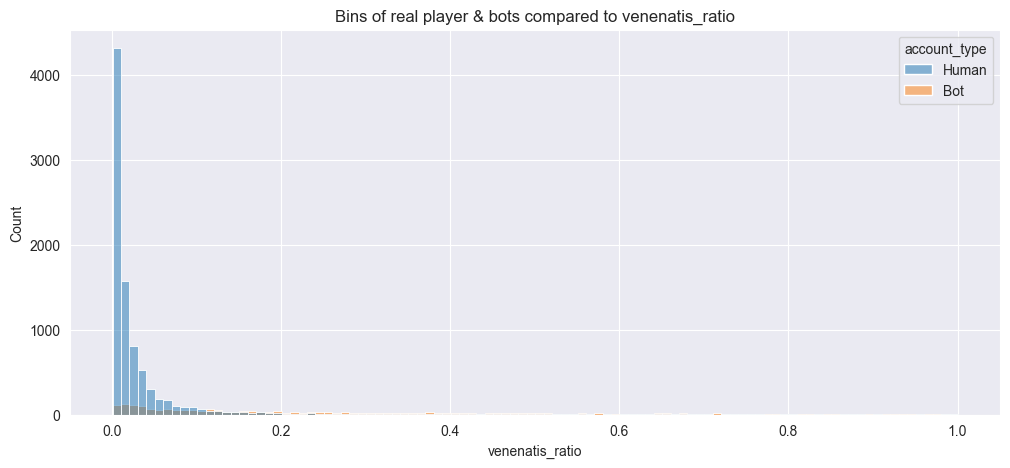

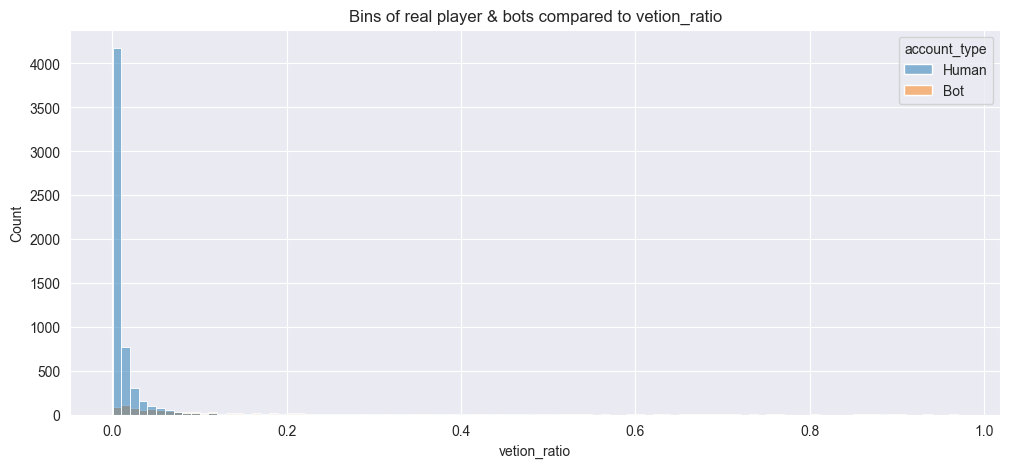

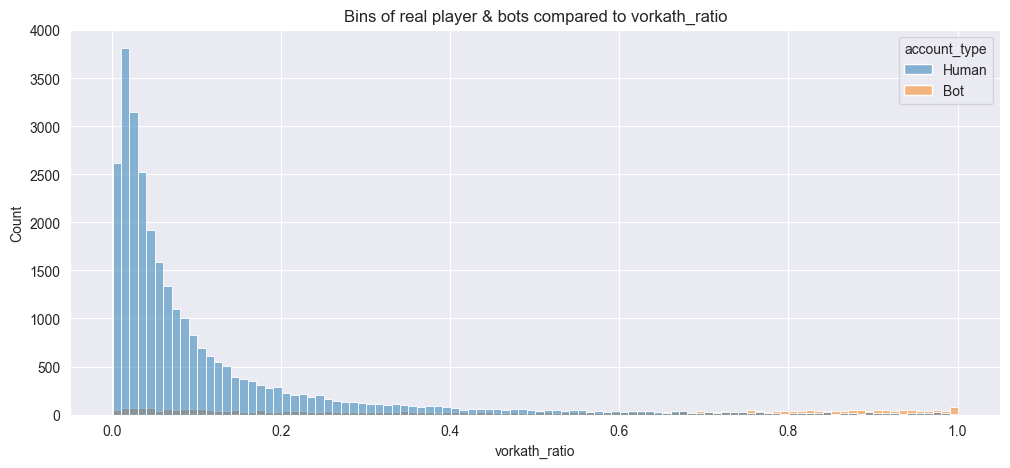

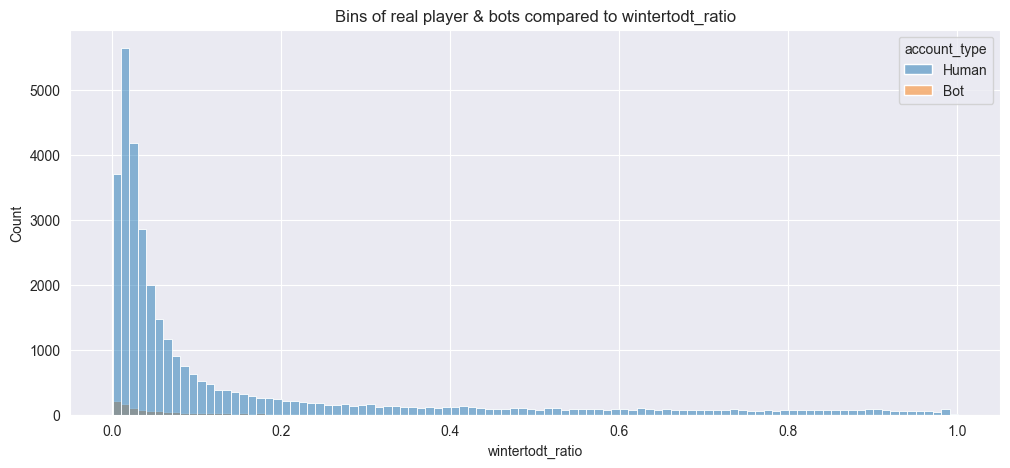

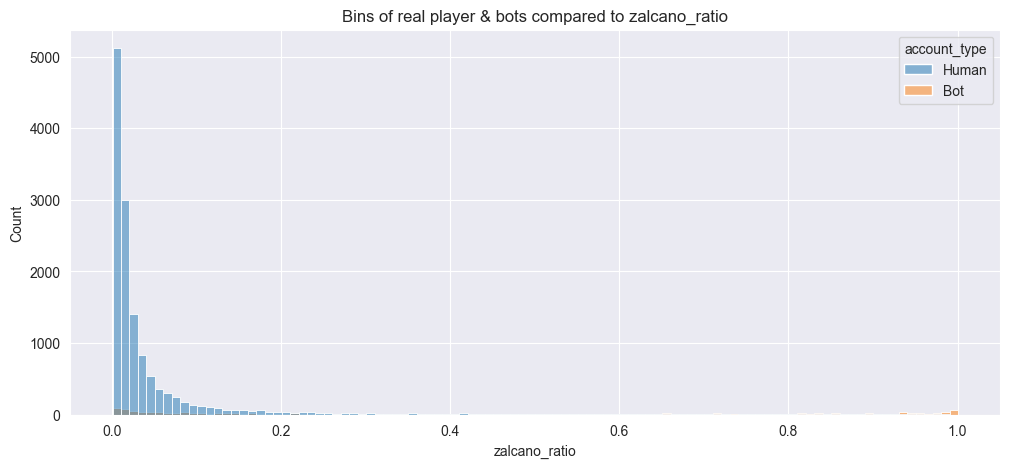

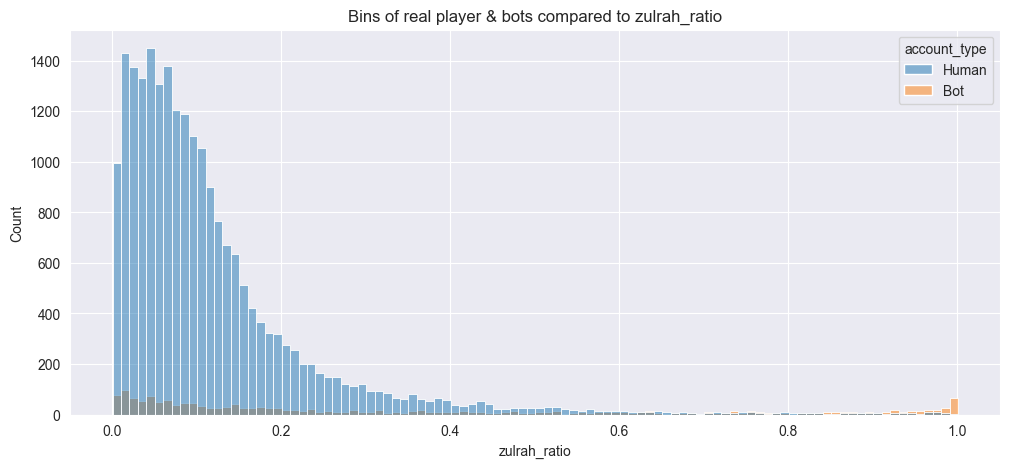

In [46]:
_df = df_player.merge(df_boss_features, left_index=True, right_index=True).copy()
for ratio in df_boss_features.columns:
    if "_ratio" not in ratio:
        continue
    query = f"{ratio} > 0 and {ratio} < 1"
    compare_ratio(ratio, _df.query(query).copy())

# look at minigame ratio real vs bots

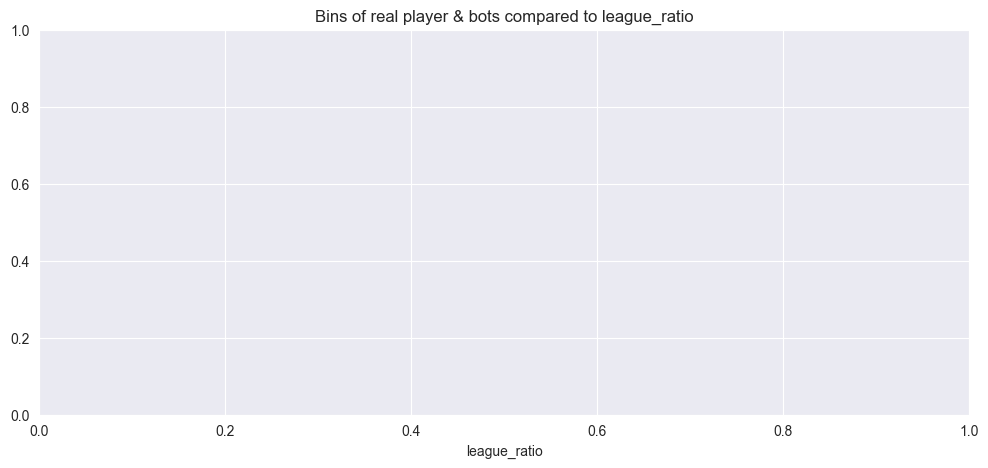

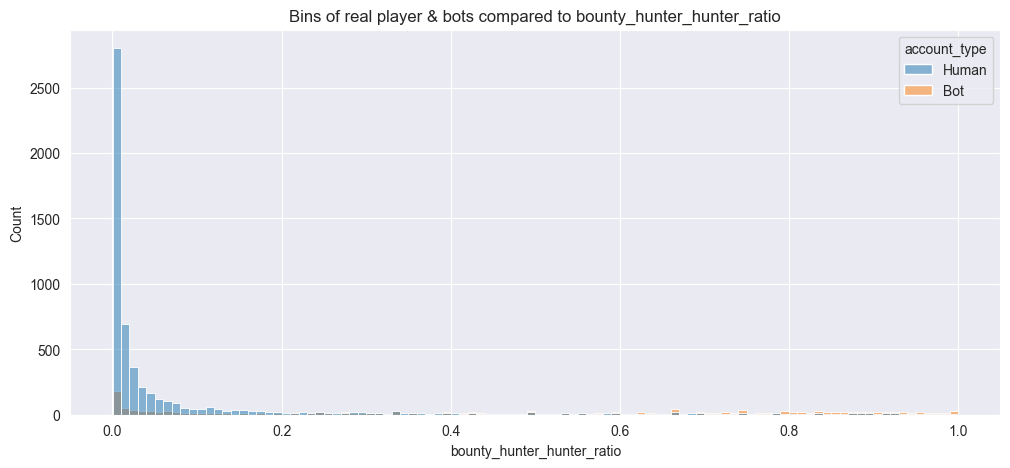

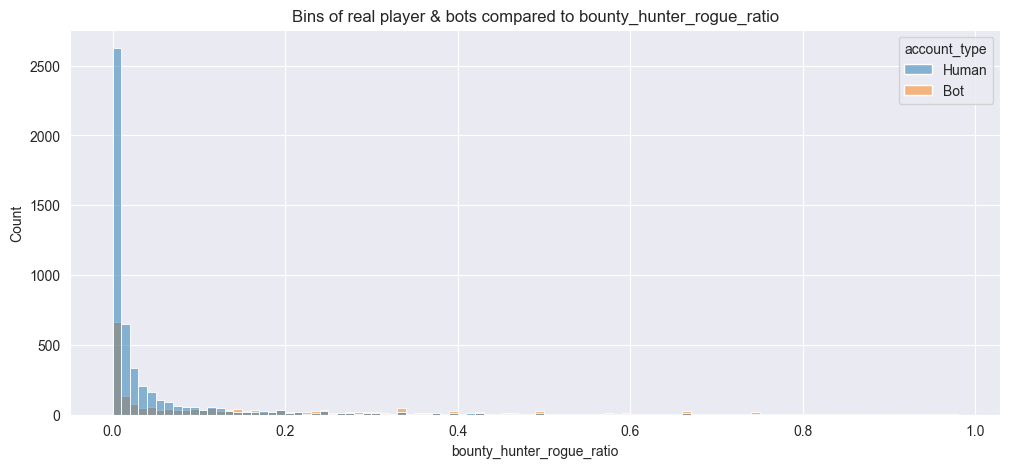

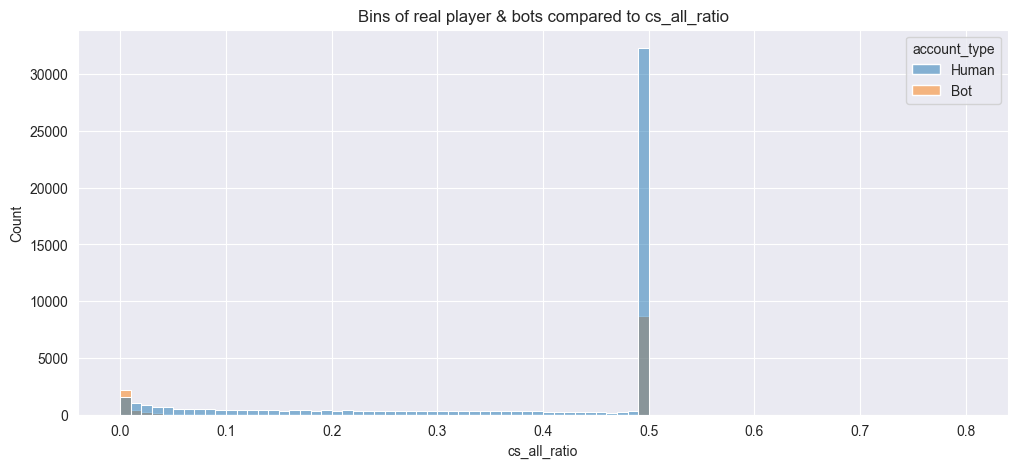

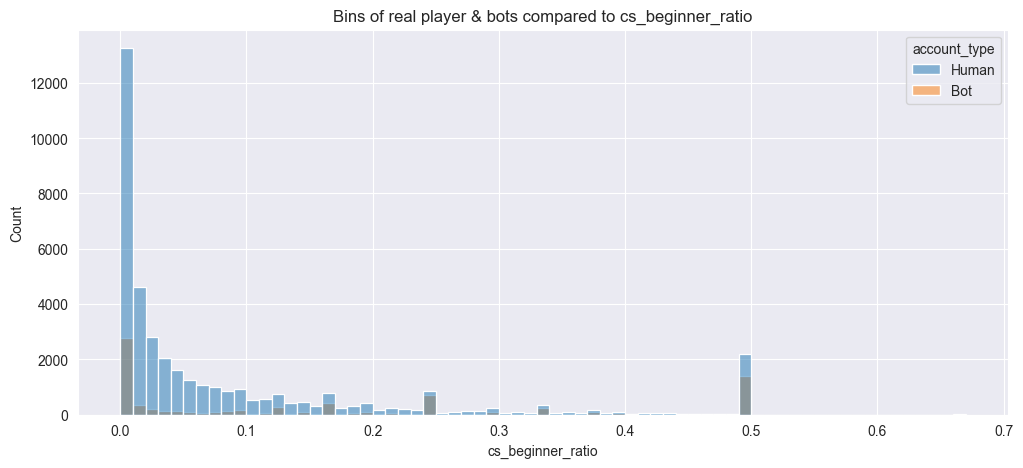

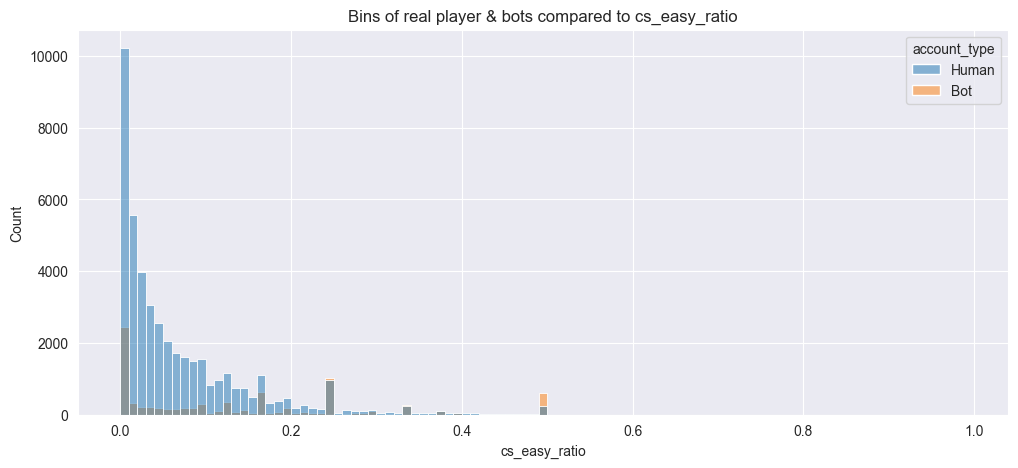

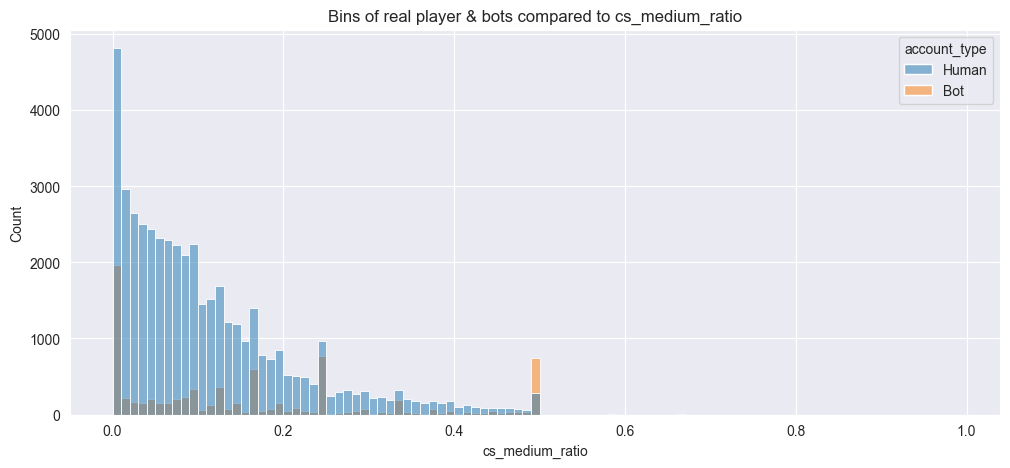

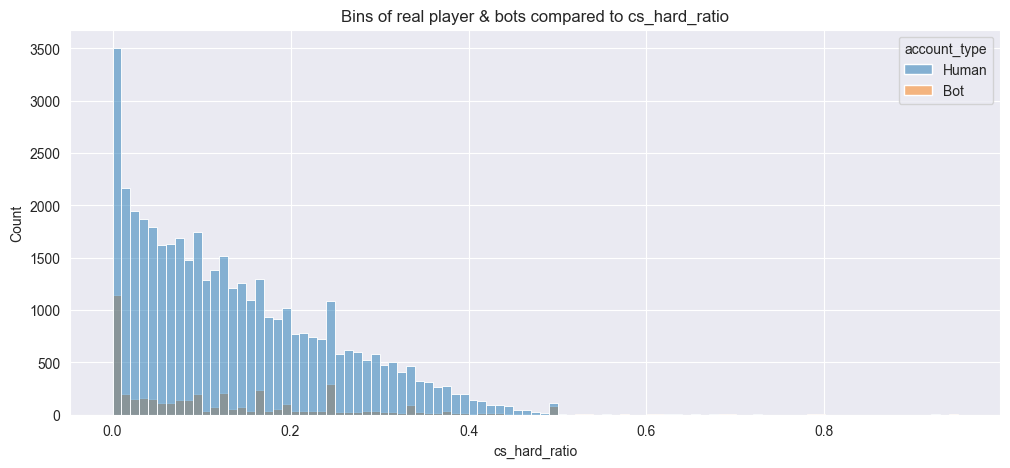

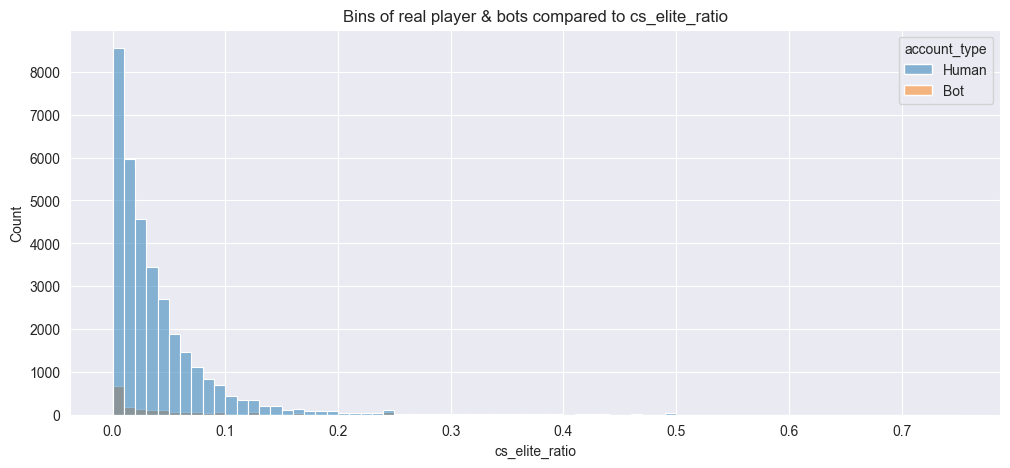

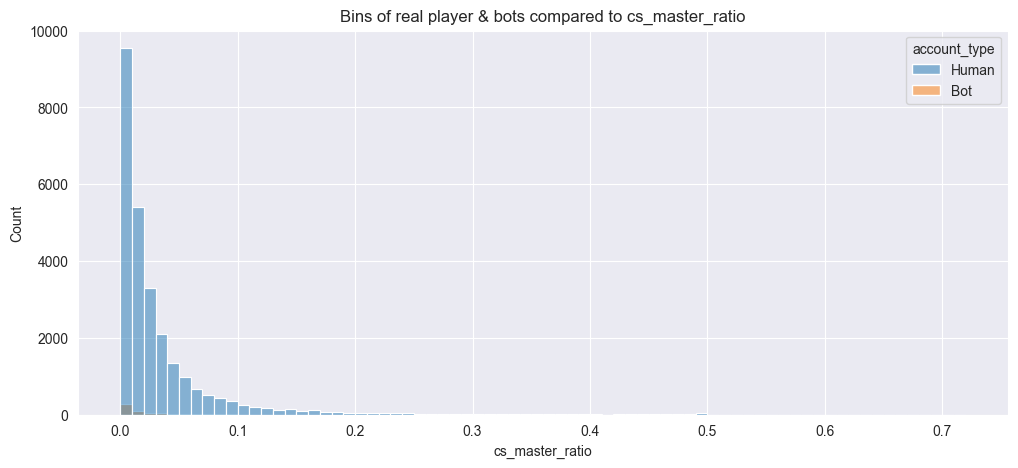

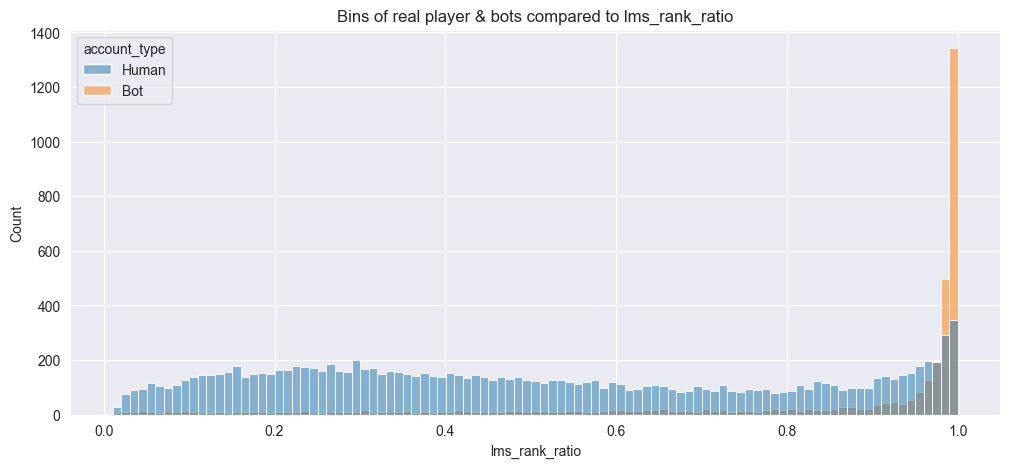

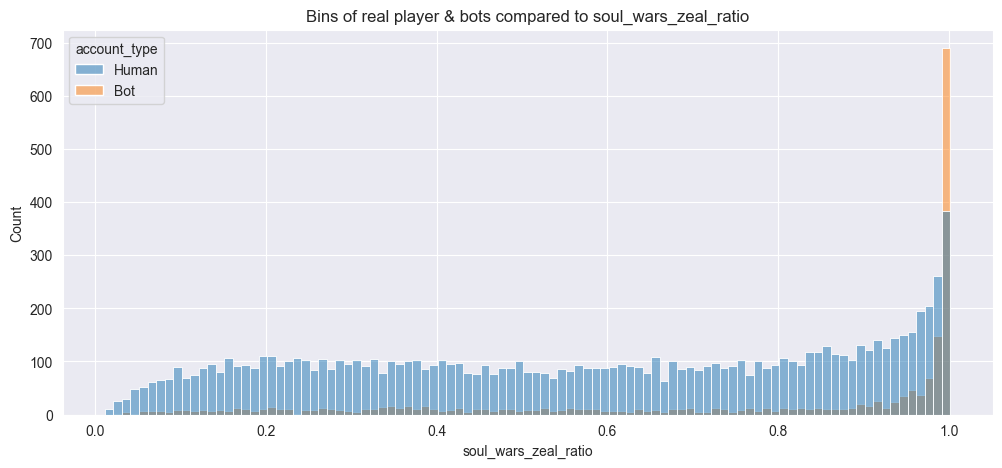

In [47]:
_df = df_player.merge(df_minigames_features, left_index=True, right_index=True).copy()
for ratio in df_minigames_features.columns:
    if "_ratio" not in ratio:
        continue
    query = f"{ratio} > 0 and {ratio} < 1"
    compare_ratio(ratio, _df.query(query).copy())